# Исследование объявлений о продаже квартир

Датасет: данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Целт проекта — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
  
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

**Задачи проекта**
   
**1. Предобработка данных:**  
1.1. Обработка пропусков  
  1.1.1. Определить, в каких столбцах есть пропуски.  
  1.1.2. Заполнить пропущенные значения там, где это возможно.   
1.2. Преобразовать тип данных в столбцах    
1.3. Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты    
1.4. Найти и устранить редкие и выбивающиеся значения.     
  1.4.1. Если природа аномалии понятна и данные действительно искажены, восстановить корректное значение  
  1.4.2. В противном случае удалить редкие и выбивающиеся значения  
   
**2. Добавление столбцов:**  
- цена одного квадратного метра;  
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).  
  
**3. Исследовательский анализ данных**  
3.1. Изучить следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.    
Построить отдельные гистограммы для каждого из этих параметров. Описать все  наблюдения по параметрам   
  
3.2.Изучить, как быстро продавались квартиры.  
- Построить гистограмму.
- Посчитать среднее и медиану.
- сколько времени обычно занимает продажа? Какие продажи можно считать быстрыми, а какие — необычно долгими?  
  
3.3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
- Изучить, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).  
Пострить графики, которые покажут зависимость цены от указанных выше параметров.  
  
3.4. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра  
  
3.5. Выделить квартиры в Санкт-Петербурге и  вычислить среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города. 
  
**4. Основной вывод проведённого исследования, инсайты и зависимости.**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment', None)

In [5]:
try:
    df = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/real_estate_data.csv'

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.hist(figsize=(15, 20));

### Предобработка данных

#### Пропущенные значения


In [ ]:
def isna_view (df):
            return  (
                        (df.isna().mean()*100)
                        .sort_values(ascending=False)
                        .to_frame()
                        .rename(columns = {0:'percent_space'})
                        .query('percent_space > 0')
                        .style.background_gradient('coolwarm').format("{:.1f}")
                    )

isna_view (df)

In [8]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Мы видим, что в датасете довольно много пропусков в данных. Их можно поделить на 2 группы: 
1. пропущенные при заполнении данных объявления человеком (`ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name`') 
2. незаполненные картографические данные (`airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest`) - . 
3. Что касается пропусков в `days_exposition`, я бы предположила, что они значимы - т.к. в этом столбце должно быть число дней от публикации до снятия, возможно, если этих данных нет, объявление не снято (квартира еще не продана).

In [9]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

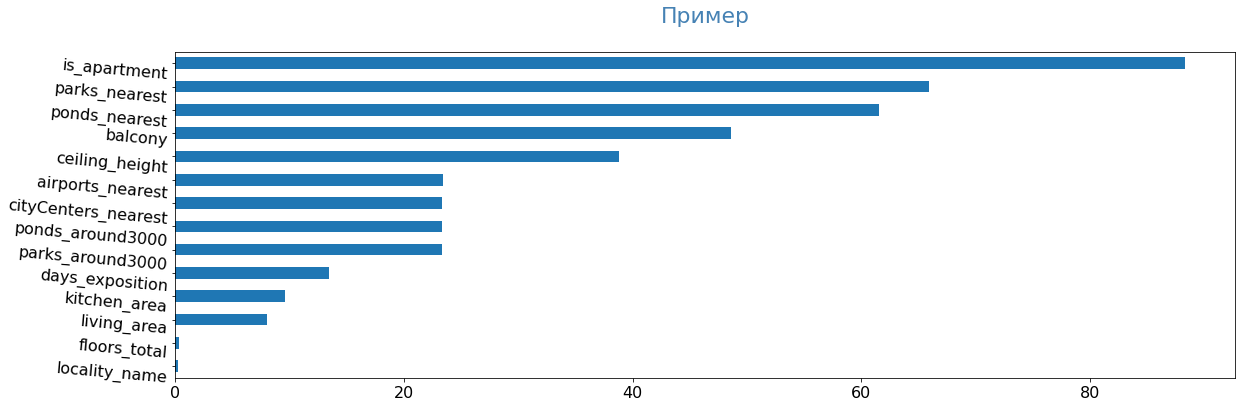

In [10]:
pass_value_barh(df)

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br /> Наглядность представления информации одна из важных составляющих работы дата-аналитика или дата-сайентиста
  

<div class="alert alert-block alert-info">
    <font size="3", color = "black">
        <br />
        Вот это тоже ценное замечание, спасибо. Я все время забываю о презентации результатов, и о том, что графики нагляднее (мне-то и таблички сойдут). 
         <br />
         <br />
        Вообще с практической точки зрения, насколько часто в работе возникает момент презентации руководству результатов анализа именно в ноутбуке (а не какой-то отдельный дашборд или, ну, не знаю, презентация в пауэрпойнте?)) 
         <br />
         <br />
        Кстати, подсмотрела еще вот такой вариант красиво показать пропуски, норм? или лучше график? (просто мне не нравится, что на графике нет цифр)))
    </font>
</div>

In [11]:
df.isna().mean()\
                .to_frame()\
                .rename(columns = {0:'missing_values'})\
                .query('missing_values > 0')\
                .sort_values('missing_values', ascending=False)\
                .style.background_gradient('coolwarm')\
                .format("{:.2%}")

,missing_values
is_apartment,88.29%
parks_nearest,65.91%
ponds_nearest,61.56%
balcony,48.61%
ceiling_height,38.80%
airports_nearest,23.38%
cityCenters_nearest,23.29%
parks_around3000,23.28%
ponds_around3000,23.28%
days_exposition,13.42%


<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в2</b></font>
<br /> 
<font size="3", color = "black">
<br />кто-то же все равно будет проверять твой проект, до момента подачи результатов проекта на стол большому боссу
    
корректным графикам да, почти всегда и в любом месте, а если они у тебя в функцию зашиты — простая копипаста, больше примеров, меньше будущей работы :)
    
добавим наглядности, лучше сразу в функцию, т.к. на проекте вызывать придется несколько раз
    
        # check
        def isna_view (df):
            return  (
                        (df.isna().mean()*100)
                        .sort_values(ascending=False)
                        .to_frame()
                        .rename(columns = {0:'percent_space'})
                        .query('percent_space > 0')
                        .style.background_gradient('coolwarm').format("{:.1f}")
                    )

        isna_view (df)

In [190]:
# check
def isna_view (df):
    return  (
                (df.isna().mean()*100)
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns = {0:'percent_space'})
                .query('percent_space > 0')
                .style.background_gradient('coolwarm').format("{:.1f}")
            )

isna_view (df)

,percent_space
parks_nearest,68.2
ponds_nearest,64.0
airports_nearest,24.6
cityCenters_nearest,24.5
cityCenters_nearest_km,24.5
parks_around3000,24.5
ponds_around3000,24.5
days_exposition,13.1


---
**Добавленные пользователем**

Что касается первой группы, ячейки с численными значениями (`ceiling_height, floors_total, living_area, kitchen_area`), возможно, незаполнены по невнимательности, либо человек не знал точной цифры. Достоверно заполнить мы из не можем, но пропусков слишком много и исключать такой пласт информации не хотелось бы. Заполним их следующим образом:
- ceiling_height - медианным занчением высоты потолков
- floors_total - значением floor (число пропусков тут небольшое, сильно на распределение они не повлияют)


In [13]:
#df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />При заполнении медианой необходимо четко отслеживать изменение других статистик: среднее, дисперсию
        
... если рассмотреть районность высоты потолков, т.к. в современных районах Питера высота потолков будет ожидаема ниже, чем в исторических, мы увидим, что заполнение подобного объема пропусков медианой или средним значением «размажет» это отличительное свойство объектов недвижимости в центре Питера
        
[Обработка пропусков в данных](https://loginom.ru/blog/missing)

In [14]:
df[~df.ceiling_height.isna()]\
        .groupby('locality_name')\
        ['ceiling_height']\
        .agg(['count', 'mean', 'median'])\
        .sort_values('count', ascending=False)\
        .head(20)

,count,mean,median
locality_name,,,
Санкт-Петербург,10104,2.803709,2.70
Всеволожск,272,2.675625,2.70
Пушкин,234,2.706667,2.60
посёлок Шушары,217,2.644470,2.63
Колпино,203,2.611429,2.50
посёлок Мурино,200,2.938900,2.70
Гатчина,149,2.781946,2.55
Петергоф,145,2.625379,2.55
посёлок Парголово,137,2.630292,2.64


<div class="alert alert-block alert-info">
    <font size="3", color = "black">
        <br />
         И правда, средние и медианные значения сильно отличаются в зависимости от населенного пункта. У меня, кстати, была идея, что высота потолков может зависеть от этажности домов, но я эту идею проверила, не нашла подтверждение и откинула. А вот другие зависимости как-то не пришли в голову(( Пожалуй, заменим пропуски в потолках медианой по населенному пункту. 
    </font>
</div>

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />у Питера будет несколько зон в зависимости от удаления от центра

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
        
__Самое важное — приобрести навык__ — любая замена пропусков очень трудоемка по ресурсам, т.к. приходится искать оптимальный вариант и если можно работать, имея пропуски в данных — лучше отказаться от заполнения
        
но есть другие случаи, когда пропуски заполнять обязательно нужно, на проекте по стат. анализу — внимательно посмотри на пропуски в данных в объединенной таблице (кроме даты оттока клиентов)
        
в итоге каждый раз мы вынуждены будем принимать решение — заполнять пропуски и как заполнять, или оставлять

In [15]:
ceiling_medians = df.groupby('locality_name')['ceiling_height'].median().round(2).to_dict()
ceiling_medians

{'Бокситогорск': 3.9,
 'Волосово': 2.5,
 'Волхов': 2.58,
 'Всеволожск': 2.7,
 'Выборг': 2.55,
 'Высоцк': 2.5,
 'Гатчина': 2.55,
 'Зеленогорск': 2.55,
 'Ивангород': 2.52,
 'Каменногорск': 2.6,
 'Кингисепп': 2.5,
 'Кириши': 2.5,
 'Кировск': 2.5,
 'Колпино': 2.5,
 'Коммунар': 2.56,
 'Красное Село': 2.6,
 'Кронштадт': 2.55,
 'Кудрово': 2.73,
 'Лодейное Поле': 2.55,
 'Ломоносов': 2.55,
 'Луга': 2.5,
 'Любань': 2.5,
 'Мурино': 2.7,
 'Никольское': 2.56,
 'Новая Ладога': 2.5,
 'Отрадное': 2.55,
 'Павловск': 2.6,
 'Петергоф': 2.55,
 'Пикалёво': 2.6,
 'Подпорожье': 2.55,
 'Приморск': 2.5,
 'Приозерск': 2.5,
 'Пушкин': 2.6,
 'Санкт-Петербург': 2.7,
 'Светогорск': 2.5,
 'Сертолово': 2.6,
 'Сестрорецк': 2.7,
 'Сланцы': 2.5,
 'Сосновый Бор': 2.5,
 'Сясьстрой': 2.55,
 'Тихвин': 2.6,
 'Тосно': 2.5,
 'Шлиссельбург': 2.5,
 'городской поселок Большая Ижора': 2.58,
 'городской поселок Янино-1': 2.72,
 'городской посёлок Будогощь': 2.62,
 'городской посёлок Виллози': 2.6,
 'городской посёлок Лесогорский': 

In [16]:
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = \
                df.loc[df['ceiling_height'].isna(), 'locality_name'].map(ceiling_medians)

In [17]:
#в некоторых населенных пунктах вообще нет значений потолков, 170 значений осталось - вот их заменим медианой по датафрейму
df['ceiling_height'].isna().sum()

156

In [18]:
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()

In [19]:
df['ceiling_height'].isna().sum()

0

In [20]:
df.loc[df['floors_total'].isna(), 'floors_total'] = df['floor']

- living_area, kitchen_area. Как мы видим, для всех пропусков в этих строках известно значение total_area и количество комнат rooms.
  Чтобы понять, как лучше заполнять пропуски, посмотрим, как зависит жилая площадь от числа комнат и от общей площади (разделим на 20 равных частей)


In [21]:
df.groupby('rooms')['living_area'].median()

rooms
0      18.000
1      17.600
2      30.500
3      45.000
4      63.600
5      91.785
6     123.900
7     145.000
8     161.000
9     179.200
10    161.400
11    133.900
12    409.700
14    195.150
15    409.000
16    180.000
19    264.500
Name: living_area, dtype: float64

In [22]:
df['total_area_bins'] = pd.qcut(df.total_area, q=20)

In [23]:
df.groupby('total_area_bins')['living_area'].median()

total_area_bins
(11.999, 31.0]    17.000
(31.0, 33.0]      17.500
(33.0, 35.2]      17.000
(35.2, 37.6]      17.300
(37.6, 40.0]      18.000
(40.0, 42.0]      19.200
(42.0, 44.0]      26.600
(44.0, 46.0]      28.000
(46.0, 49.0]      28.095
(49.0, 52.0]      30.000
(52.0, 55.0]      31.000
(55.0, 58.0]      34.000
(58.0, 61.0]      37.000
(61.0, 64.8]      37.900
(64.8, 69.9]      40.000
(69.9, 75.0]      43.895
(75.0, 82.0]      46.900
(82.0, 93.52]     51.450
(93.52, 116.0]    60.000
(116.0, 900.0]    88.000
Name: living_area, dtype: float64

На мой взгляд, отношения общей и жилой площади больше отражают реальность, в дф с комнатами есть подозрительно большие значения, на них явно влияют выбросы. (которые в общей площади явно сосредоточены в последней ячейке). Значит заполним пропуски в living_area на основе медианы с группировкой по total_area_bins, а кухню посчитаем по примерной формуле  (total_area - living_area) / 2. 
 
А также надо учесть, что некоторые квартиры - студии или со свободной планировкой, укажем в них площадь кухни 0. (так как она пока неизвестна). А также укажем как 0 появившиеся в результате подсчетов отрицательные значения (когда медианная предполагаемая жилая площадь оказывается больше реальной общей)

In [24]:
df[['total_area', 'living_area', 'kitchen_area']].describe(percentiles=[0,0.25,0.5,0.75,0.95])

,total_area,living_area,kitchen_area
count,23699.000000,21796.000000,21421.000000
mean,60.348651,34.457852,10.569807
std,35.654083,22.030445,5.905438
min,12.000000,2.000000,1.300000
0%,12.000000,2.000000,1.300000
25%,40.000000,18.600000,7.000000
50%,52.000000,30.000000,9.100000
75%,69.900000,42.300000,12.000000
95%,116.000000,69.000000,20.000000
max,900.000000,409.700000,112.000000


In [25]:
#df['living_area'] = df.groupby('total_area_bins')\
#                               ['living_area'].apply(lambda x: x.fillna(x.median()))

In [26]:
#df.loc[(df['kitchen_area'].isna()) & ((df['studio'] == True) | (df['open_plan'] == True)), 'kitchen_area'] = 0

In [27]:
#df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = (df['total_area'] - df['living_area']) / 2

In [28]:
#df.loc[df['kitchen_area'] < 0, 'kitchen_area'] = 0

In [29]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
total_area_bins             0
dtype: int64

<div class="alert alert-da
            nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />После заполнения синтетическими данными столбцов, стоит провести проверку на корректность значений всех наших площадей, т.к. есть (коридоры, сан.узлы, балконы)
        
        total_area*0.9 <= (living_area + kitchen_area)
                                     
если алгоритм приводит к появлению аномалий, стоит подумать над его содержимым

<div class="alert alert-block alert-info">
    <font size="3", color = "black">
        <br />
        Так, ну мысль про аномалии мне понятна: то есть мы предполагаем, что площадь всех комнат + кухни должна составлять не больше 90% общей площади? Если на коридоры и санузлы остается меньше, это аномалия. (кстати, балконы в общую площадь не входят)))
        <br />
        Таких значений действительно довольно много. То есть алгоритм никуда не годится? Забавно, но это условие не соблюдается в исходных данных (462 аномальных строки в датафрейме есть и перед заполнением пропусков))  
       <br />  <br />
       Но допустим, уже известные данные нас не интересуют, мы хотим проверить, не появилось ли новых аномалий после заполнения пропусков синтетическими данными. Значит сохраним заранее id объявлений с пропущенными значениями 
</font>
</div>


In [30]:
df[((df.living_area + df.kitchen_area) > df.total_area*0.9)]\
                [['total_area', 'living_area', 'kitchen_area']]\
                .shape[0]

462

In [31]:
living_kithen_missing_values = df[(df.living_area.isna()) | (df.kitchen_area.isna())].index
len(living_kithen_missing_values)

2717

<div class="alert alert-block alert-info">
    <font size="3", color = "black">
 
        
Итак, начнем со строк, где пропущено только одно из значений этих параметров.
  
Во-первых, есть строки, где мы знаем площадь кухни, но не знаем жилую. 
Их посчитаем как (total_area * 0.85 - kitchen_area), 15% площади оставим на подсобные помещения
       
Во-вторых, обратный случай - когда известна жилая, но неизвестна кухня. 
Тогда кухня будет (total_area - living_area) /2 (половина разницы между общей и жилой, ведь жилую площадь могли указать равной общей)
</font>
</div>

In [32]:
df[(df.living_area.isna()) & ~(df.kitchen_area.isna())][['total_area', 'living_area', 'kitchen_area']]

,total_area,living_area,kitchen_area
7,71.60,NaN,18.90
116,97.20,NaN,18.30
165,60.20,NaN,10.20
238,43.40,NaN,12.40
360,57.84,NaN,10.19
...,...,...,...
23534,39.00,NaN,10.00
23584,66.00,NaN,8.00
23587,88.00,NaN,14.00
23588,69.00,NaN,10.00


In [33]:
df.loc[(df.living_area.isna()) & ~(df.kitchen_area.isna()), 'living_area'] = \
                        df.total_area * 0.85 - df.kitchen_area

In [34]:
df[~(df.living_area.isna()) & (df.kitchen_area.isna())][['total_area', 'living_area', 'kitchen_area']]

,total_area,living_area,kitchen_area
144,27.0,15.5,NaN
155,317.0,183.0,NaN
178,153.0,89.4,NaN
188,38.5,18.5,NaN
199,37.4,17.0,NaN
...,...,...,...
23592,29.0,18.0,NaN
23604,44.3,27.0,NaN
23637,26.0,17.0,NaN
23655,40.5,19.6,NaN


In [35]:
df.loc[~(df.living_area.isna()) & (df.kitchen_area.isna()), \
                           'kitchen_area'] = \
                                            (df.total_area  - df.living_area) /2

In [36]:
#проверка
df[((df.living_area + df.kitchen_area) > df.total_area*0.9)
               &(df.index.isin(living_kithen_missing_values))].shape[0]

58

<div class="alert alert-block alert-info">
    <font size="3", color = "black">
Ну вот, уже 58 значений не подходят под наш критерий) но с этим, кажется, ничего не поделать, мы считали площадь кухни на основании имеющихся данных.
<br /> <br />             
В-третьих, вернемся к моменту, когда мы не знаем и жилую, и кухню. Так как нам нужно выдержать пропорцию "общая - 10% <= жилая+кухня", медиана площади нам точно не подойдет. Но мы можем посчитть, какой процент от общей площади в среднем занимает жилая и попробуем заполнить пропуски именно так (но учтем, что этот процент может отличаться в зависимости от размера квартиры), и возьмем его медиану в разбивке по площадям. 
    <br /> <br /> 
    А площадь кухни посчитаем по предыдущей формуле.
</font>
</div>

In [37]:
df['living_total_percent'] = round(df.living_area / df.total_area, 2)

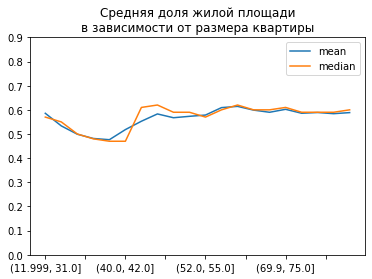

In [38]:
df.groupby('total_area_bins')['living_total_percent'].agg(['mean', 'median']).plot(xlabel='')\
.set_title('Средняя доля жилой площади\nв зависимости от размера квартиры');
plt.ylim(0, 0.9);

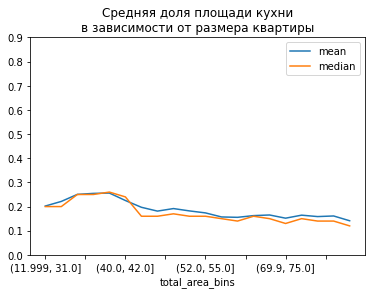

In [39]:
#на зависимость кухни от площади посмотрим ради интереса
df['kitchen_total_percent'] = round(df.kitchen_area / df.total_area, 2)
df.groupby('total_area_bins')['kitchen_total_percent'].agg(['mean', 'median']).plot()\
.set_title('Средняя доля площади кухни\nв зависимости от размера квартиры');
plt.ylim(0, 0.9);

<div class="alert alert-block alert-info">
    <font size="3", color = "black">
ОФФТОП - И вот тут у меня вопрос, вообще имеет смысл досконально разбираться в матплотлибе? (Что ты используешь в работе, его или сиборн/плотли/что-то еще?)
</font>
</div>

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в2</b></font>
<br /> 
<font size="3", color = "black">
<br />80% матплотлиб, 20% сиборн и другие новые библиотеки, но туда лучше пока не ходить, научимся работать с матплотлибом, остальное быстро наверстаем...

In [40]:
df['living_total_percent'] = \
                df.groupby('total_area_bins')['living_total_percent'].apply(lambda x: x.fillna(x.median()))

In [41]:
df.loc[(df.living_area.isna()), 'living_area'] = \
                    round(df.total_area * df.living_total_percent, 2)

In [42]:
df.loc[(df.kitchen_area.isna()), 'kitchen_area'] = \
                    round(df.total_area * 0.85 - df.living_area, 2)

In [43]:
#проверка
df[((df.living_area + df.kitchen_area) > df.total_area*0.9)
               &(df.index.isin(living_kithen_missing_values))].shape[0]

58

<div class="alert alert-block alert-info">
    <font size="3", color = "black">
Ну по крайней мере после заполнения пропусков, в которых не было известно оба параметра, аномальных позиций не прибавилось. Ура! (уже надоели эти кухни)))
</font>
</div>

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Классное решение, молодец

In [192]:
# check
data = df.copy()

data[data['total_area']*0.9 <= (data ['living_area']+data ['kitchen_area'])][['total_area'
                                                                                  ,'living_area','kitchen_area']].shape


(344, 3)

In [44]:
df = df.drop(columns=['living_total_percent', 'kitchen_total_percent'], axis=1)

---
Ячейки (`is_apartment, balcony`) с большим количеством пропусков могли быть не заполнены, т.к. значение должно быть отрицательное (квартира не является апартаментами, балконов нет), значит мы можем их заполнить False и 0 соответственно.  

In [45]:
df.is_apartment.value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

In [46]:
df.balcony.value_counts(dropna=False)

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [47]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [48]:
df['balcony'] = df['balcony'].fillna(0)

In [49]:
df.is_apartment.value_counts(dropna=False)

False    23649
True        50
Name: is_apartment, dtype: int64

In [50]:
df.balcony.value_counts(dropna=False)

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Переменная `locality_name` содержит название населенного пункта, пропущенное, возможно, из-за невнимательности, либо ошибки на этапе записи данных. Рассмотрим пропуски внимательно. Их немного, зато интересно попробовать найти замену.

In [51]:
print('Число пропущенных названий населенных пунктов -', df[(df.locality_name.isna())].shape[0])

Число пропущенных названий населенных пунктов - 49


In [52]:
df[(df.locality_name.isna())].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_bins
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,False,...,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,"(75.0, 82.0]"
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.70,4.0,42.6,2,False,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,"(75.0, 82.0]"
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.70,24.0,15.6,3,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,"(42.0, 44.0]"
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.70,24.0,33.1,21,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,"(61.0, 64.8]"
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.70,5.0,30.8,5,False,...,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,"(46.0, 49.0]"


Можно заметить, что у некотрых пропущенных названий населенных пугктов есть картографические данные (airports_nearest и т.д.). Это, кстати, говорит, о большей вероятности не человечесой, а программной ошибки. Попробуем для таких названий найти соответствие среди известных нам населенных пунктов (предполагая, что расстояние до аэропорта одинаковое для одинаковых нас.пунктов). Сделаем словарик для расстояний и соответствующих им названий, и заполним пропуски, для которых нашлось соответствие.

In [53]:
df[(df.locality_name.isna())]['airports_nearest'].value_counts().head()

22041.0    8
11206.0    2
37123.0    2
23478.0    2
10556.0    1
Name: airports_nearest, dtype: int64

In [54]:
airport_distance = df.groupby('airports_nearest')['locality_name'].last().to_dict()

In [55]:
df.loc[df['locality_name'].isna(), 'locality_name'] = \
            df.loc[df['locality_name'].isna(), 'airports_nearest']\
            .map(airport_distance)

In [56]:
print('Теперь число пропущенных названий населенных пунктов -', df[(df.locality_name.isna())].shape[0])

Теперь число пропущенных названий населенных пунктов - 28


Уменьшили число неизвестных населенных пунктов почти вполовину, до 28. А остальные удалим.

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
попытка классная, для точного определения геоточки, необходимо знать три координаты, объекты могут находиться на одинаковом радиусе от аэропорта, но в противоположных направлениях ...

<div class="alert alert-block alert-info">
    <font size="3", color = "black">
        <br />       
Ну... Я рассуждала так: у нас значения указаны с точностью до метра, что-то я очень сомневаюсь, что есть 2 места в разных населенных пунктах, равноудаленные от аэропорта с точностью до метра в противоположных направлениях) А еще часто встречается пропущенное значение 22041 (8 раз).  В любом случае, этих значений совсем немного, и погоды они не делают)
    </font>
</div>

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> ✓

In [57]:
df = df.dropna(subset=['locality_name'])

---
**Картографические**

Теперь вернемся ко второй группе - незаполненные катографические данные. Судя по почти одинаковому количеству пропусков в нескольких колонках, в системе просто отсутствуют данные о некоторых населенных пунктах (сколько расстояние до аэропорта, о парках и водоемах). Попробуем проверить.

In [58]:
df[~df['airports_nearest'].isna()].locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово',
       'Ломоносов', 'Петергоф', 'Пушкин', 'Колпино', 'Кронштадт',
       'посёлок Металлострой', 'Павловск', 'Сестрорецк', 'Красное Село',
       'посёлок Понтонный', 'Зеленогорск', 'посёлок Молодёжное',
       'посёлок Стрельна', 'посёлок Александровская', 'посёлок Песочный',
       'посёлок Петро-Славянка', 'посёлок Репино', 'посёлок Сапёрный',
       'посёлок Щеглово', 'поселок Лисий Нос', 'посёлок Левашово',
       'посёлок Белоостров', 'поселок Мурино', 'посёлок Лисий Нос',
       'посёлок Усть-Ижора'], dtype=object)

In [59]:
#города, у которых есть картографические данные
with_cart_info = df[~df['airports_nearest'].isna()].locality_name.unique()
len(with_cart_info)

28

In [60]:
#города, у которых нет картографических данных, их больше
without_cart_info = df[df['airports_nearest'].isna()].locality_name.unique()
len(without_cart_info)

344

In [61]:
#однако, некотторые населенные пункты есть в обоих списках,
without_cart_info[np.in1d(without_cart_info, with_cart_info)]

array(['поселок Мурино', 'Санкт-Петербург', 'посёлок Шушары',
       'посёлок Щеглово', 'Красное Село', 'Ломоносов', 'Кронштадт',
       'Колпино'], dtype=object)

Мы видим, что отчасти наше предположение верное - поселки и города с отсутствующими данными есть и их значительно больше, чем картографированных. Однако, у некоторых объявлений из картографированных городов тоже отсутствуют данные - быть может, из-за технических ошибок. Не знаю, что с ними делать, их слишком много, чтобы не принимать во внимание. Оставим так, потом посмотрим


In [62]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15602
ponds_around3000         5510
ponds_nearest           14569
days_exposition          3180
total_area_bins             0
dtype: int64

#### Типы данных

In [63]:
df.dtypes

total_images               int64
last_price               float64
total_area               float64
first_day_exposition      object
rooms                      int64
ceiling_height           float64
floors_total             float64
living_area              float64
floor                      int64
is_apartment                bool
studio                      bool
open_plan                   bool
kitchen_area             float64
balcony                  float64
locality_name             object
airports_nearest         float64
cityCenters_nearest      float64
parks_around3000         float64
parks_nearest            float64
ponds_around3000         float64
ponds_nearest            float64
days_exposition          float64
total_area_bins         category
dtype: object

Типы данных поменяем следующие: даты (first_day_exposition) - преобразуем эту колонку в datetime.  
А также можно перевести в int количество балконов и этажей, их число точно не быает дробным. 


In [64]:
df['first_day_exposition'] = pd.to_datetime(df.first_day_exposition)

In [65]:
df['balcony'] = df['balcony'].astype(int)

In [66]:
df['floors_total'] = df['floors_total'].astype(int)

In [67]:
df.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
total_area_bins               category
dtype: object

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> тип данных изменен корректно

#### Дубликаты

In [68]:
df.duplicated().sum()

0

Явных дубликатов нет, однако, как нам известно, в названиях населенных пунктов довольно много неявных дубликатов. Посчитаем уникальные названия, приведем названия к одному виду и посчитаем их опять

In [69]:
df.locality_name.sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [70]:
df.locality_name.nunique()

364

In [71]:
df['locality_name'] = df.locality_name.apply(lambda x: x.replace('ё', 'е')
                       .replace('городской поселок', 'поселок')
                       .replace('поселок городского типа', 'поселок')
                        .replace('коттеджный поселок', 'поселок')
                        .replace('поселок при железнодорожной станции', 'поселок станции'))

In [72]:
df.locality_name.nunique()

319

Результат преобразований - из 364 уникальных названия получили 319

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />хорошая работа по избавлению от неявных дубликатов

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />Как вариант
    
Для того, __чтобы изменить лишь часть строки,__ стоит добавить к коду — .str
    
        .str.replace('посёлок','поселок')

[Метод str.replace() в Python, меняет подстроку/символ в строке](https://docs-python.ru/tutorial/operatsii-tekstovymi-strokami-str-python/metod-str-replace/)

#### Выбросы и аномальные значения

Посмотрим на статистики методом describe и визуально, на гистограммах. 

In [73]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23671.000000,2.367100e+04,23671.000000,23671.000000,23671.000000,23671.000000,23671.000000,23671.000000,23671.000000,23671.000000,18137.000000,18160.000000,18161.000000,8069.000000,18161.000000,9102.000000,20491.000000
mean,9.862068,6.541156e+06,60.330006,2.070212,2.733789,10.676566,34.744404,5.895780,10.883028,0.591272,28797.490765,14194.112996,0.611365,490.800843,0.770387,517.887937,180.894490
std,5.683099,1.089265e+07,35.654492,1.078603,1.009930,6.596512,22.842932,4.886813,6.504288,0.959390,12632.233300,8605.087926,0.802152,342.474504,0.938310,277.744551,219.819168
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.800000,2.000000,7.000000,0.000000,18582.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.500000,0.000000,26737.000000,13105.000000,0.000000,454.000000,1.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.705000,3.000000,2.700000,16.000000,42.500000,8.000000,12.300000,1.000000,37284.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,476.350000,33.000000,125.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [74]:
(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,671.00","23,671.00","23,671.00","20,491.00","23,671.00","23,671.00","23,671.00","23,671.00","23,671.00"
min,0.00,12.00,1.00,1.00,"12,190.00",2.00,0.00,1.00,1.00
max,19.00,900.00,100.00,"1,580.00","763,000,000.00",476.35,125.00,33.00,60.00


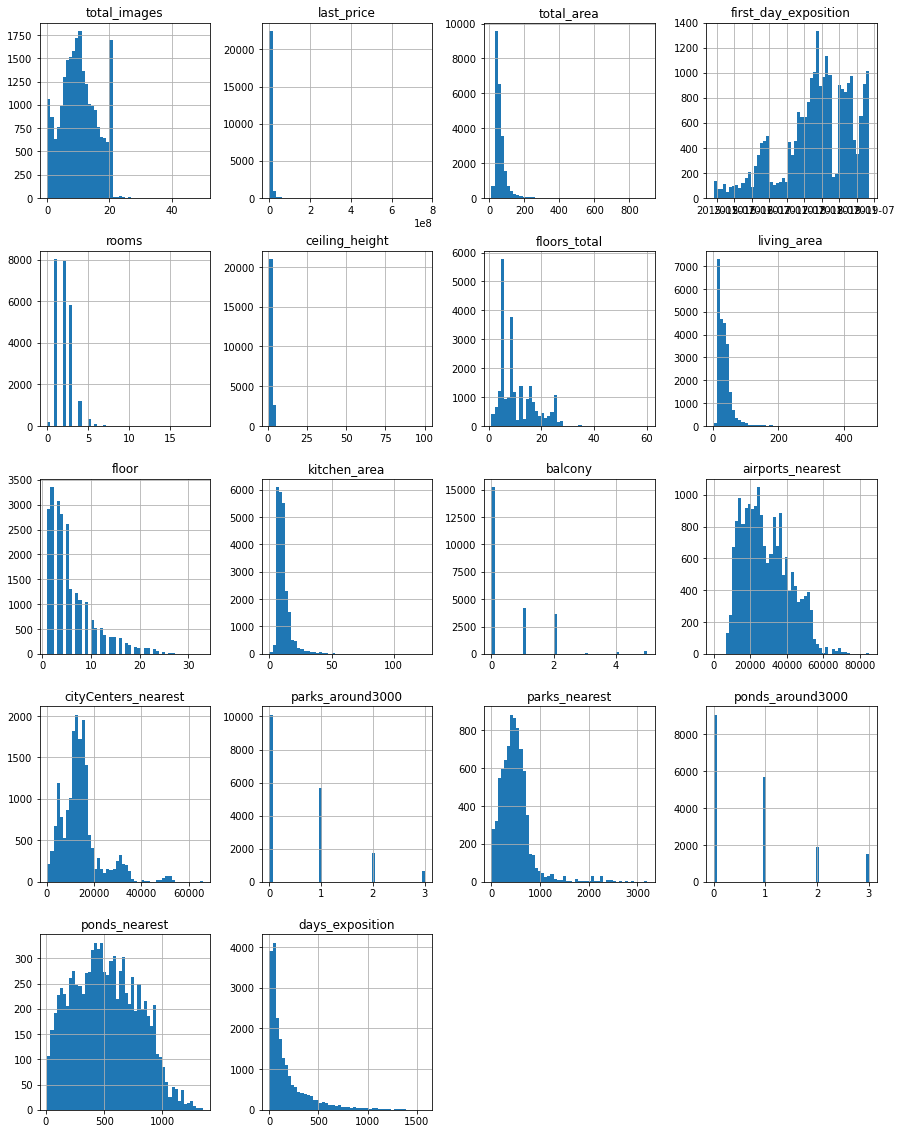

In [75]:
df.hist(figsize=(15, 20), bins=50);

Столбцы, которые явно имеют какие-то аномальные значения - last_price, ceiling_height. Также надо проверить площади - total_area, living_area, kitchen_area, в них тоже есть большие значения, но непонятно, это ошибка или просто большая площадь.
___
**last_price**

In [76]:
df['last_price_mln'] = df.last_price / 1000000

In [77]:
df.last_price_mln.describe(percentiles=[0,0.05,0.5,0.95,0.99])

count    23671.000000
mean         6.541156
std         10.892650
min          0.012190
0%           0.012190
5%           1.870000
50%          4.650000
95%         15.300000
99%         36.000000
max        763.000000
Name: last_price_mln, dtype: float64

Мы видим, что 99й перцентиль - 36 миллионов, что, в общем, еще понятно, но максимум 763 миллиона, что уже прямо запредельно. Посмотрим на самые дорогие, вдруг они просто ноликом ошиблись. 

In [78]:
df\
                .groupby(['locality_name','total_area', 'living_area', 'cityCenters_nearest'])\
                [['last_price_mln']]\
                .mean()\
                .sort_values('last_price_mln', ascending=False)\
                .head(30)

last_price_mln
locality_name   total_area living_area cityCenters_nearest                
Санкт-Петербург 400.0      250.00      3956.0                    763.00000
                900.0      409.70      7877.0                    420.00000
                401.0      204.00      2389.0                    401.30000
                190.0      95.00       1197.0                    330.00000
                618.0      258.00      5297.0                    300.00000
                187.5      63.70       1073.0                    289.23840
                285.7      182.80      6235.0                    245.00000
                410.0      218.00      5297.0                    240.00000
                500.0      385.00      5297.0                    230.00000
                268.0      132.00      5297.0                    190.87000
                347.0      260.00      3794.0                    180.00000
                243.0      145.00      555.0                     160.00000
                242.4      131.00      2242.0                    159.98400
                260.0      180.00      436.0                     159.00000
                310.0      190.00      4785.0                    155.00000
                500.0      300.00      6150.0                    150.00000
                230.0      220.00      5845.0                    150.00000
                256.0      179.00      3639.0                    148.00000
                631.0      476.35      4972.0                    140.00000
                631.2      322.30      4972.0                    140.00000
                241.0      144.60      3503.0                    140.00000
                310.0      250.00      7251.0                    135.00000
                166.0      52.00       5955.0                    135.00000
                380.0      150.00      4504.0                    131.00000
                304.0      182.40      5913.0                    130.27828
                231.0      148.00      1280.0                    130.00000
                307.8      187.90      4785.0                    130.00000
                224.5      163.50      2335.0                    125.00000
                267.7      107.03      7442.0                    124.48000
                248.7      131.00      2242.0                    124.35000

Мы видим, что топ-30 самых дорогих квартир территориально в Санкт-Петербурге, площадь их тоже довольно велика, и они довольно близко от центра. Делаем вывод, что это просто столичная элитная недвижимость, а не аномалия. 
  
Однако вся эта элитность для анализа будет нам очень мешать, очень смещая статистики и мешая выяснить закономерности, так что мы, пожалуй, удалим 5% самых дорогих квартир.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> верное решение, все что дороже 40 млн. для нашей выборки редкость и нарушает её однородность

In [79]:
df['last_price'].quantile(0.95)

15300000.0

In [80]:
df = df[df['last_price'] < df['last_price'].quantile(0.95)]

In [81]:
df.sort_values('last_price').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_bins,last_price_mln
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.00,25,False,...,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,"(93.52, 116.0]",0.01219
14911,5,430000.0,54.0,2018-06-26,2,2.70,3,30.78,3,False,...,поселок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0,"(52.0, 55.0]",0.43000
17456,7,430000.0,30.4,2019-04-22,1,2.50,2,16.00,1,False,...,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(11.999, 31.0]",0.43000
16274,18,440000.0,40.0,2018-07-10,1,2.70,5,18.80,1,False,...,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0,"(37.6, 40.0]",0.44000
16219,14,450000.0,38.5,2018-07-11,2,2.65,2,18.10,1,False,...,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0,"(37.6, 40.0]",0.45000


Также мы видим, что 12 тыс (самая низкая цена - это тоже явно ошибка).

In [82]:
df = df[df.last_price != 12190.0]

---
**ceiling_height**


Посмотрим на высоту потолков, распределение и самые выделяющиеся экземпляры

In [83]:
df.ceiling_height.describe(percentiles=[0,0.05,0.5,0.99])

count    22482.000000
mean         2.719252
std          1.030213
min          1.000000
0%           1.000000
5%           2.500000
50%          2.700000
99%          3.500000
max        100.000000
Name: ceiling_height, dtype: float64

In [84]:
df[~df.ceiling_height.isna()].ceiling_height.sort_values(ascending=False).head(40)

22869    100.00
3148      32.00
22336     32.00
21377     27.50
2158      27.00
21824     27.00
4876      27.00
5807      27.00
20478     27.00
5246      27.00
17857     27.00
10773     27.00
22938     27.00
5669      26.00
18545     25.00
355       25.00
4643      25.00
11285     25.00
9379      25.00
14382     25.00
6246      25.00
5076      24.00
20507     22.60
17496     20.00
15061     14.00
10069     13.85
10067     13.85
313       13.85
22309     10.30
5863       8.30
17442      8.00
3474       8.00
15743      8.00
21227      5.80
12628      5.30
1053       5.00
2802       4.80
19142      4.70
6802       4.50
10159      4.50
Name: ceiling_height, dtype: float64

Что ж, я еще могу понять 4-5 метровые потолки в дореволюционной застройке, или 6-8 в пентхаусе, но больше 10 - уже явно ошибка. Изменим "прозрачную" ошибку с порядками (25м == 2.5м), а непонятные 14, 20 и 100 удалим.

In [85]:
df.loc[(df['ceiling_height'] >= 22) & (df['ceiling_height'] <= 32), 
       'ceiling_height'] = df['ceiling_height'].apply(lambda x: x / 10)

In [86]:
df = df.loc[df.ceiling_height < 9]

In [87]:
df[~df.ceiling_height.isna()].ceiling_height.sort_values().head(30)

22590    1.00
5712     1.20
16934    1.75
4212     2.00
22960    2.00
16884    2.00
19329    2.00
20520    2.00
19098    2.00
16446    2.00
11352    2.00
5850     2.00
2572     2.00
552      2.00
12755    2.20
17794    2.25
20507    2.26
1582     2.30
5498     2.30
17762    2.30
23498    2.30
227      2.34
11125    2.40
3633     2.40
13271    2.40
5918     2.40
10160    2.40
2236     2.40
14463    2.40
5542     2.40
Name: ceiling_height, dtype: float64

Высота потолков меньше 2,4 метра тоже явно ошибка - по нормам в жилых помещениях она менее 2,4 быть просто не может

In [88]:
df = df.loc[df.ceiling_height >= 2.4]

---
**total_area, living_area, kitchen_area, rooms**


In [89]:
df[['total_area', 'living_area', 'kitchen_area']].describe(percentiles=[0,0.01,0.5,0.99])

,total_area,living_area,kitchen_area
count,22453.000000,22453.000000,22453.000000
mean,55.238958,31.806537,10.136072
std,21.997133,15.200293,4.560555
min,12.000000,2.000000,0.000000
0%,12.000000,2.000000,0.000000
1%,25.000000,13.000000,4.000000
50%,50.200000,29.900000,9.100000
99%,127.000000,81.144000,27.309600
max,320.000000,192.321000,100.700000


Выглядит неплохо - это последствия того, что мы убрали данные 5% самых дорогих квартир. Однако все еще есть слишком маленькие значения и слишком большие значения. Удалим по 1% сверху и снизу.

In [90]:
df = df[(df['total_area'] < df['total_area'].quantile(0.99)) & 
        (df['total_area'] > df['total_area'].quantile(0.01))]
df = df[(df['living_area'] < df['living_area'].quantile(0.99)) & 
        (df['living_area'] > df['living_area'].quantile(0.01))]
df = df[(df['kitchen_area'] < df['kitchen_area'].quantile(0.99)) & 
        (df['kitchen_area'] > df['kitchen_area'].quantile(0.01))]

In [91]:
df[['total_area', 'living_area', 'kitchen_area']].describe(percentiles=[0,0.01,0.5,0.99])

,total_area,living_area,kitchen_area
count,21116.000000,21116.000000,21116.000000
mean,54.019282,31.033652,9.874104
std,18.233287,12.736505,3.637273
min,25.150000,13.320000,4.950000
0%,25.150000,13.320000,4.950000
1%,29.000000,14.200000,5.000000
50%,50.100000,30.000000,9.000000
99%,106.000000,65.879750,22.517000
max,126.500000,71.900000,25.740000


Посмотрим, как соотносятся друг другом площади, цены и количество комнат. 

In [92]:
df.groupby('rooms')\
            [['total_area', 'living_area', 'kitchen_area', 'last_price']]\
            .agg(['count', 'mean', 'median'])

total_area                   living_area                   kitchen_area  \
           count       mean median       count       mean median        count   
rooms                                                                           
0             59  31.441186  29.00          59  18.970678  17.85           59   
1           7539  37.870574  37.00        7539  18.333941  17.80         7539   
2           7601  54.751017  53.00        7601  31.674957  30.50         7601   
3           5158  72.497555  70.90        5158  45.304599  44.00         5158   
4            700  82.245271  83.00         700  54.210891  54.87          700   
5             56  95.469643  97.95          56  60.511607  64.00           56   
6              3  95.666667  94.00           3  63.000000  68.00            3   

                        last_price                            
            mean median      count          mean      median  
rooms                                                         
0       6.482034   6.00         59  3.220729e+06   3000000.0  
1       9.594042   9.30       7539  3.806137e+06   3600000.0  
2       9.746545   9.00       7601  5.153704e+06   4700000.0  
3      10.440435   9.20       5158  6.424512e+06   5883642.0  
4      10.235971   9.10        700  7.053361e+06   6800000.0  
5      11.643571  10.25         56  7.522857e+06   7625000.0  
6      12.400000  15.00          3  1.070000e+07  12000000.0

Ну вот и обработанный датафрейм. Мы заполнили пропуски, где это возможно, поменяли тип данных на правильный, узнали цены на элитную недвижимость в Питере, и исключили ее из датафрейма, исправили откровенно ошибочные данные о высоте потолков. Гистограммы уже выглядят получше

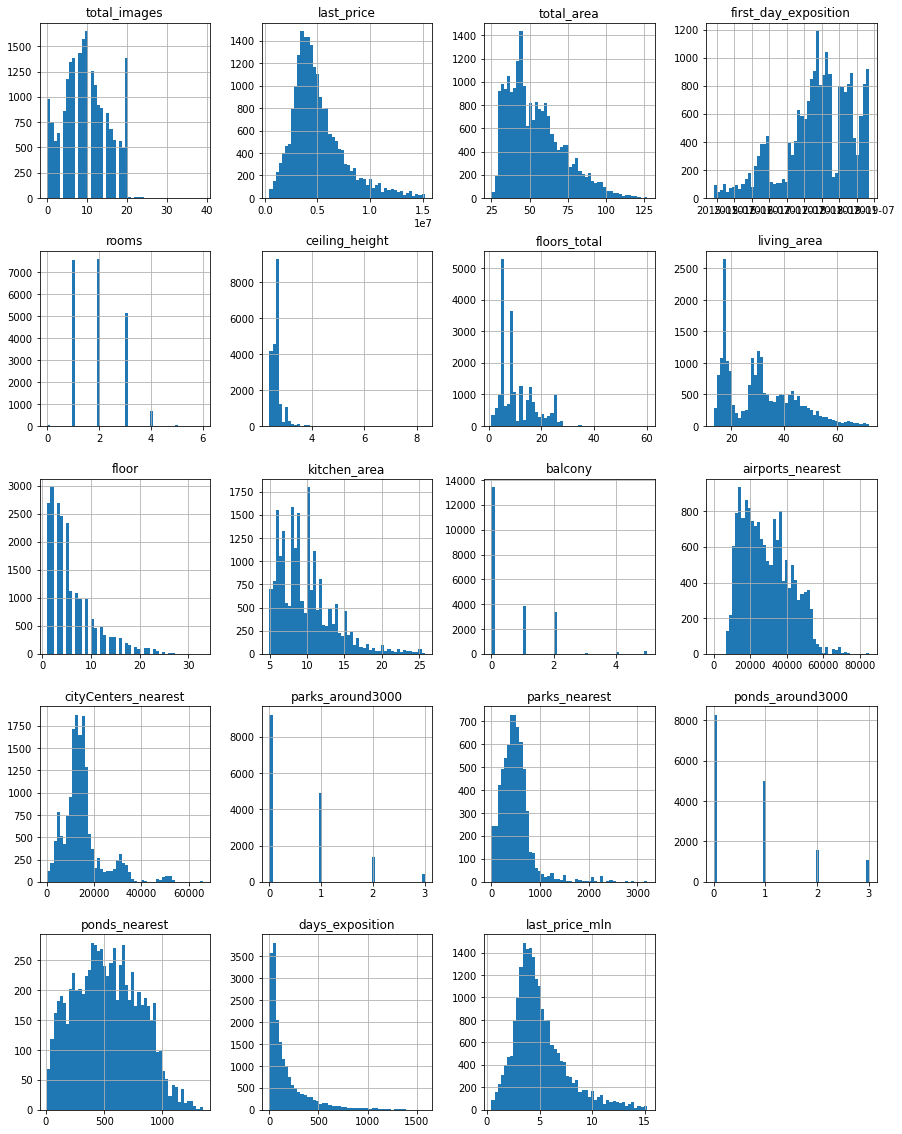

In [93]:
df.hist(figsize=(15, 20), bins=50);

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> проверим результаты работы по удалению аномалий и редкостей

In [193]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"20,183.00","20,183.00","20,183.00","17,540.00","20,183.00","20,183.00","20,183.00","20,183.00","20,183.00"
min,0.00,25.15,2.40,1.00,"430,000.00",13.32,4.95,1.00,1.00
max,6.00,126.50,8.30,616.00,"15,200,000.00",71.90,25.74,33.00,36.00


<div class="alert alert-d
            anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Совет, что считать редкостью или аномалией для нашего датасета        
             
допустим в Питере и окрестностях по состоянию на 2019 г. были или не были дома этажностью выше 30-ти этажей, а если и были, то можно ли считать их обычными объявлениями для нашего датасета
        
завершить работу по очистке датасета от редких значений(есть и другие аномалии) в других параметрах, таблица выше в помощь
        
если квартира продается дольше двух лет, наверно это редкость ...
        
в последнем случае фильтровать необходимо внимательно, колонка содержит пропуски 
        
<b>алгоритм фильтрации столбца с пропусками: задаем основное условие фильтрации, + прибавляем условие не трогать записи с пропусками</b>


<div class="alert alert-block alert-info">
    <font size="3", color = "black">
Как я понимаю, нужно удалить аномальные и редкие значения еще для столбцов days_exposition, и  floors_total.
  
Вот тут у меня вопрос, кстати, по поводу аномальных значений и выбросов. Ловлю себя постоянно на том, что мне их удалять жалко/страшно, вдруг какие-то важные данные потеряются. 
            
Вот как в реальной работе? Главное - понять тенденции? Поэтому чик там 5 процентов, тут выбросы выкинул?... Осталось 60% значений, зато самые типичные? Или как? Есть какая-то красная линия, за которую не стоит заходить в попытке избавиться от аномалий?      
</font>
</div>

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />На этом проекте мы и пытаемся хоть как-то сделать нашу выборку однородной, у нас два подхода к подготовке датасета для исследования
        
Можно механически бороться с выбросами, ...
               
основная проблема такого подхода — не учитывается неоднородность нашей выборки: у нас здесь и малые поселки и вторая столица страны, и исторический фонд и массовая застройка, и однушки и довольно большое кол-во многокомнатных квартир ...
        
у нас совершенно неоднородная выборка по объектам, 
        
если бы у нас в таблице были бы только однокомнатные квартиры из определенного района массовой застройки, тогда да, мы бы боролись с выбросами традиционными способами, при нашем многообразии населенных пунктов, многокомнатности такие подходы не работают... т.е. они работают, но это усложнит наш проект — придется разбить и объединить записи нашей таблицы по нескольким параметрам (кол-во комнат, район, и т.д.), а затем только выполнять все остальные пункты на каждой отдельной выборке
        
Остается другой подход — убираем редкие значения и следим за количеством потерь... 
        
Хороший пример, высота потолков, которую мы отрезаем по нижней и верхней планке, это скорее аномальные записи, посмотрим на другой аспект — на редкости: кол-во комнат

т.е. мы не говорим о том, что квартир с кол-ом комнат выше 7 не бывает, мы говорим, что для нашего исследования это редкие выбивающиеся из общей картины уникальные объекты, по которым необходимо проводить отдельную работу ...
        

        
красная линия — главная задача проекта, сможешь решить её с пятью строчками в датасете, будет здорово, сэкономим огромное кол-во ресурсов, начиная с серверов, но это ...
        
реально только главная задача определяет кол-во информации, которое потребуется для её решения, меньше нельзя, больше тоже чревато длительностью обработки — это больной вопрос дата-аналитика, нюансы профессиии
     
        
на учебных проектах принимаем условно 10% от выборки

---
**Floor and floors_total**

Посмотрим на этажи всего дома, и конкретного объявления. Вообще у меня этажность 30+ не вызывает вопросов, по крайней мере для московских новостроек это обычное дело, думаю, в Петербурге тоже. Но посмотрим на эти высотки в разрезе населенных пунктов

In [95]:
df[['floor', 'floors_total']].describe(percentiles=[0,0.01,0.5,0.99])

,floor,floors_total
count,21116.000000,21116.000000
mean,5.884874,10.745075
std,4.881320,6.584214
min,1.000000,1.000000
0%,1.000000,1.000000
1%,1.000000,2.000000
50%,4.000000,9.000000
99%,23.000000,26.000000
max,33.000000,60.000000


In [96]:
df[df.floors_total > df.floors_total.quantile(0.99)].value_counts('floors_total')

floors_total
27    146
35     22
28     21
36      3
29      1
33      1
34      1
60      1
dtype: int64

In [97]:
df[df.floors_total > df.floors_total.quantile(0.99)].groupby('locality_name')['floors_total']\
                .agg(['count', 'mean'])

,count,mean
locality_name,,
Кронштадт,1,60.000000
Мурино,4,27.000000
Санкт-Петербург,68,30.352941
деревня Кудрово,1,27.000000
поселок Бугры,1,27.000000
поселок Мурино,68,27.058824
поселок Парголово,51,27.137255
поселок Шушары,1,27.000000
поселок имени Свердлова,1,27.000000


На мой взгляд, выбираются из общей массы высокие дома в деревнях, а вот сам Петербург, Мурино и Парголово я бы трогать не стала. Тем более для дальнейшего анализа они не понадобятся

In [98]:
for_del_loc_name = df[df.floors_total > df.floors_total.quantile(0.99)]\
                    .groupby('locality_name')\
                    ['floors_total']\
                .agg(['count', 'mean'])\
                .query('count == 1')\
                .index

In [99]:
df = df[~((df.floors_total > df.floors_total.quantile(0.99)) & (df.locality_name.isin(for_del_loc_name)))]

---
**days_exposition**

Вот этот параметр я как-то упустила в удалении аномалий, а ведь действительно, этот параметр явно распределен ненормально, с длинных хвостом выбросов. 

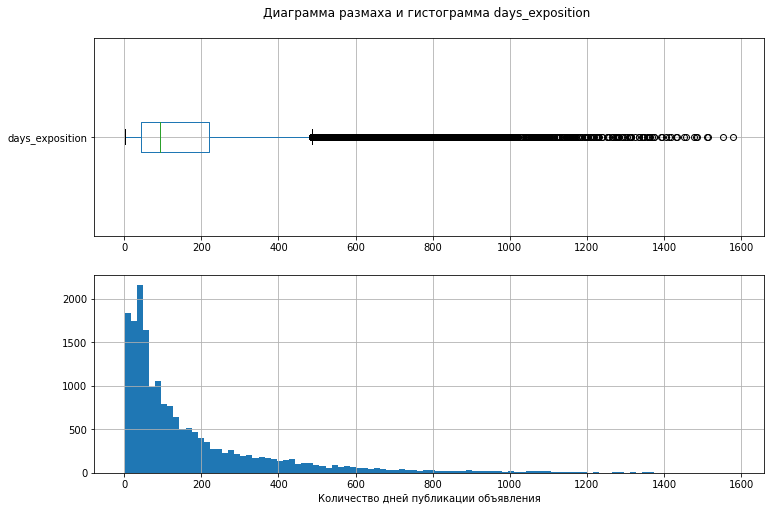

In [100]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
df.boxplot('days_exposition', ax=ax[0], vert = False);
df.days_exposition.hist(bins=100, ax=ax[1]);
ax[1].set_xlabel('Количество дней публикации объявления')
ax[0].set_title('Диаграмма размаха и гистограмма days_exposition \n');

In [101]:
df.days_exposition.describe(percentiles=[0,0.05,0.5,0.95])

count    18468.000000
mean       174.378005
std        212.466785
min          1.000000
0%           1.000000
5%           9.000000
50%         92.000000
95%        617.000000
max       1580.000000
Name: days_exposition, dtype: float64

Думаю, 5% самых долго висящих объявлений можно смело удалять 

In [102]:
df = df[(df.days_exposition < 617) | (df.days_exposition.isna())]

### Добавление в таблицу новых столбцов

Добавляем столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20183 entries, 0 to 23697
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20183 non-null  int64         
 1   last_price            20183 non-null  float64       
 2   total_area            20183 non-null  float64       
 3   first_day_exposition  20183 non-null  datetime64[ns]
 4   rooms                 20183 non-null  int64         
 5   ceiling_height        20183 non-null  float64       
 6   floors_total          20183 non-null  int64         
 7   living_area           20183 non-null  float64       
 8   floor                 20183 non-null  int64         
 9   is_apartment          20183 non-null  bool          
 10  studio                20183 non-null  bool          
 11  open_plan             20183 non-null  bool          
 12  kitchen_area          20183 non-null  float64       
 13  balcony         

In [104]:
df['square_meter_price'] = (df['last_price'] / df['total_area']).round(2)

In [105]:
df['publication_day_of_week'] = pd.DatetimeIndex(df['first_day_exposition']).day_of_week

In [106]:
df['publication_month'] = pd.DatetimeIndex(df['first_day_exposition']).month

In [107]:
df['publication_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [108]:
def floor_type(row):
    try:
        floors_total = row['floors_total']
        floor = row['floor']
        if floor == 1:
            return 'первый'
        if floor == floors_total:
            return 'последний'
        return 'другой'
    except:
        print('Error!')

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Функция хорошая, стоит учесть крайние условия: нулевые и отрицательные значения

<div class="alert alert-block alert-info">
    <font size="3", color = "black">
А можешь пояснить? Ведь в нашем дф после избавления от аномалий нет ни нулевых, ни отрицательных значений. А если бы были - сработал бы except      
</font>
</div>

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />except под вопросом, скорее они попали бы в категорию другие
        
        # if 1 < floor < floors_total:
        
а нулевые или отрицательные значения могут прилететь по выборке на Москве или Торонто :), а у тебя будет все готово       
        

In [109]:
df['floor_type'] = df.apply(floor_type, axis=1)

In [110]:
df['cityCenters_nearest_km'] = np.ceil(df['cityCenters_nearest'] / 1000)

In [111]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,total_area_bins,last_price_mln,square_meter_price,publication_day_of_week,publication_month,publication_year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,755.0,NaN,"(93.52, 116.0]",13.000,120370.37,3,3,2019,другой,17.0
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.60,1,False,...,NaN,81.0,"(40.0, 42.0]",3.350,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.30,4,False,...,574.0,558.0,"(55.0, 58.0]",5.196,92785.71,3,8,2015,другой,14.0
5,10,2890000.0,30.4,2018-09-10,1,2.60,12,14.40,5,False,...,NaN,55.0,"(11.999, 31.0]",2.890,95065.79,0,9,2018,другой,NaN
7,5,7915000.0,71.6,2019-04-18,2,2.70,24,41.96,22,False,...,NaN,NaN,"(69.9, 75.0]",7.915,110544.69,3,4,2019,другой,12.0


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> данные добавлены корректно, молодец

### Исследовательский анализ данных

#### Описание параметров квартиры

In [112]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'total_area_bins', 'last_price_mln',
       'square_meter_price', 'publication_day_of_week', 'publication_month',
       'publication_year', 'floor_type', 'cityCenters_nearest_km'],
      dtype='object')

**Общая площадь**

In [113]:
df.total_area.describe()

count    20183.000000
mean        53.837533
std         18.120484
min         25.150000
25%         40.000000
50%         50.000000
75%         64.300000
max        126.500000
Name: total_area, dtype: float64

<AxesSubplot:>

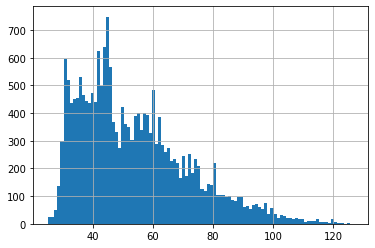

In [114]:
df.total_area.hist(bins=100)

<AxesSubplot:>

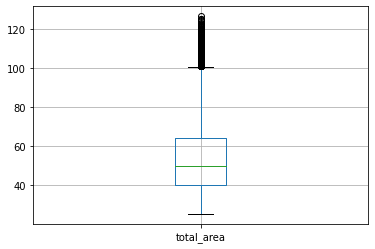

In [115]:
df.boxplot('total_area')


<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br /> Компактность графика
    
точка с запятой  в конце строки помогает избавиться от служ. информации

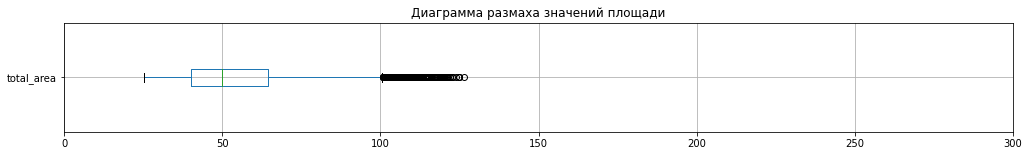

In [116]:
# check
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = df[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 300); 

<div class="alert alert-block alert-info">
    <font size="3", color = "black">
Вот тут бааальшое спасибо, все время забываю, что горизонтальные боксплотики красивее)) (и нагляднее))
</font>
</div>

(0.0, 110.0)

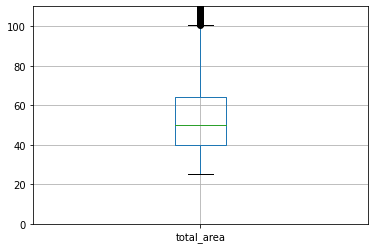

In [117]:
#c отсеченными выбросами
df.boxplot('total_area')
plt.ylim(0, 110)

Общая площадь - от 25 до 126 м2, медиана и среднее почти рядом (50 и 53), распределение ненормальное, смещено влево, с хвостом больших значений - выбросов (который мы изрядно подрезали)

**Жилая площадь**

In [118]:
df.living_area.describe()

count    20183.000000
mean        30.939403
std         12.685130
min         13.320000
25%         18.600000
50%         29.840000
75%         40.000000
max         71.900000
Name: living_area, dtype: float64

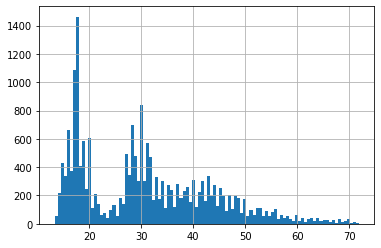

In [119]:
df.living_area.hist(bins=100);

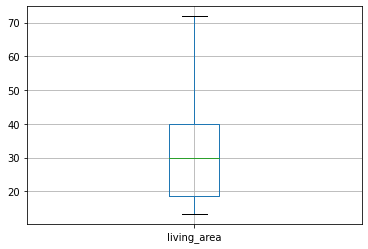

In [120]:
df.boxplot('living_area');

Жилая площадь - от 13 до 71, распределение ненормальное, с несколькими частотными пиками и большим "хвостом" выбросов, медиана около 30, среднее около 31

**Площадь кухни**

In [121]:
df.kitchen_area.describe()

count    20183.000000
mean         9.855878
std          3.629561
min          4.950000
25%          7.000000
50%          9.000000
75%         11.600000
max         25.740000
Name: kitchen_area, dtype: float64

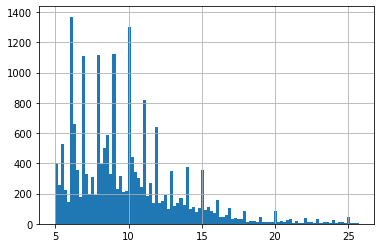

In [122]:
df.kitchen_area.hist(bins=100);

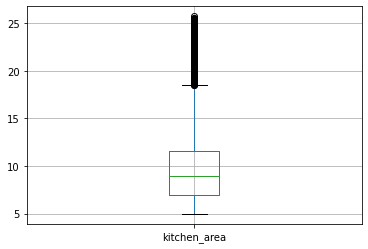

In [123]:
df.boxplot('kitchen_area');

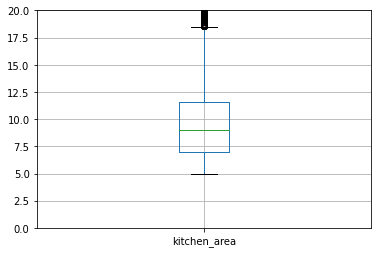

In [124]:
df.boxplot('kitchen_area')
plt.ylim(0,20);

Площадь кухни - от 5и до 25. Однако основное число наблюдений располагается в промежутке от 7 до 12ти м2 (среднее и медиана около 9м2).

**Цена**

In [125]:
df.last_price.describe()

count    2.018300e+04
mean     5.025175e+06
std      2.507038e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.500000e+06
75%      6.100000e+06
max      1.520000e+07
Name: last_price, dtype: float64

In [126]:
df.last_price_mln.describe()

count    20183.000000
mean         5.025175
std          2.507038
min          0.430000
25%          3.400000
50%          4.500000
75%          6.100000
max         15.200000
Name: last_price_mln, dtype: float64

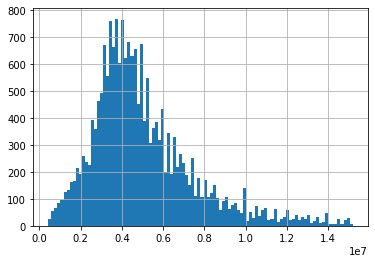

In [127]:
df.last_price.hist(bins=100);

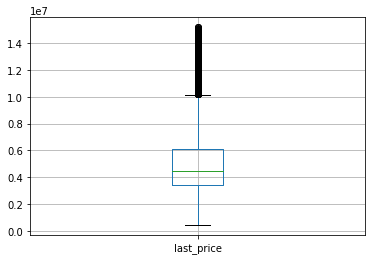

In [128]:
df.boxplot('last_price');

Цена квартиры варьируется от 430 тыс до 15 миллионов (после удаления 5% самых дорогих квартир) с медианой 4,5 млн и средним 5,168 млн., у распределения также хвост из больших значений, который влияет на среднее

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Классные графики, наглядные

Подписи осей на графиках и название добавят ясности и читабельности.
Это важные элементы любой визуализации. Как добавить подписи и названия, смотри [здесь](https://pyprog.pro/mpl/mpl_axis_signatures.html) и [там](https://pyprog.pro/mpl/mpl_title.html), и
        
[тут](https://proproprogs.ru/modules/matplotlib-razmeshchaem-standartnye-tekstovye-elementy-na-grafike?ysclid=l6agtioc6f299002507)

**Количество комнат**

In [129]:
df.rooms.describe()

count    20183.000000
mean         1.951494
std          0.875726
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

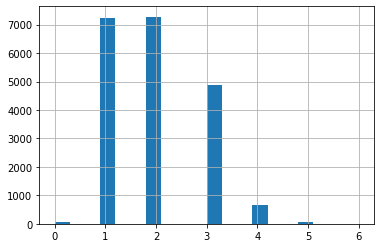

In [130]:
df.rooms.hist(bins=20);

Число комнат принимает только дискретные значения, от 0 до 7, медиана 2 (и среднее около того)

**Высота потолков**

In [131]:
df.ceiling_height.describe()

count    20183.000000
mean         2.680211
std          0.203690
min          2.400000
25%          2.550000
50%          2.700000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

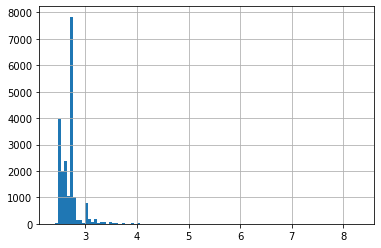

In [132]:
df.ceiling_height.hist(bins=100);

Высота потолков - от 2.4 до 8.3 (медиана 2.65, среднее чуть больше). Так как мы заполняли пропуски медианой, на распределении пик на этом месте. Распределение ненормальное.

**Этаж**

In [133]:
df.floor.describe()

count    20183.000000
mean         5.897736
std          4.881476
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

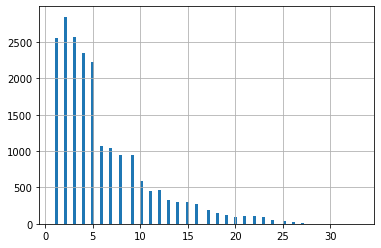

In [134]:
df.floor.hist(bins=100);

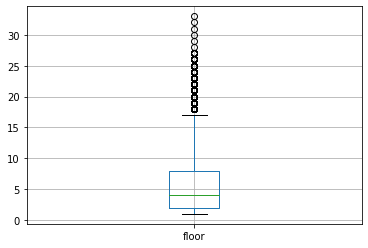

In [135]:
df.boxplot('floor');

In [136]:
df.floor_type.value_counts()

другой       14801
последний     2832
первый        2550
Name: floor_type, dtype: int64

In [137]:
df.floors_total.describe()

count    20183.000000
mean        10.756082
std          6.577749
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

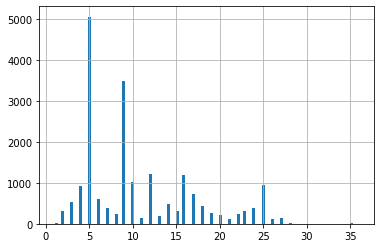

In [138]:
df.floors_total.hist(bins=100);

В целом картина этажей и этажности совпадает с действительностью - много квартир в 5этажках, поменьше в 9-10этажках, высоких этажей мало.  В распределении этажности есть пики самых популярных значений - здания в 5 и 9 этажей. Зданий выше 25 этажей довольно мало. Около 75% квартир располагаются не на первом и не на опследнем этаже.

**Расстояния**

In [139]:
df[['airports_nearest', 'cityCenters_nearest','parks_nearest']].describe()

,airports_nearest,cityCenters_nearest,parks_nearest
count,15217.000000,15232.000000,6412.000000
mean,28964.914766,14899.722886,488.163911
std,12948.324041,8388.223185,325.842959
min,0.000000,208.000000,1.000000
25%,18050.000000,10645.000000,289.750000
50%,27280.000000,13589.500000,458.000000
75%,37727.000000,16603.000000,614.000000
max,84853.000000,65952.000000,3190.000000


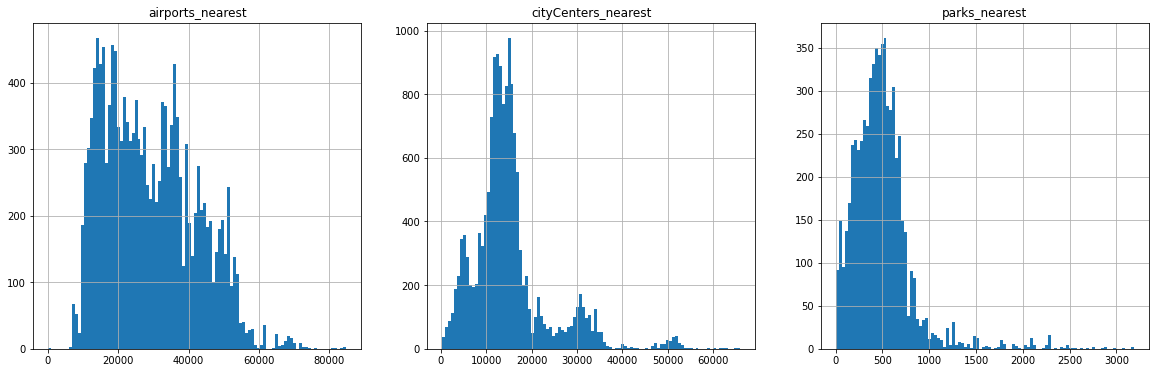

In [140]:
params = ['airports_nearest', 'cityCenters_nearest', 'parks_nearest']
fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharex=False)

for i, param in enumerate(params):
    df[param].hist(bins=100, ax=ax[i])
    ax[i].set_title(f'{param}')

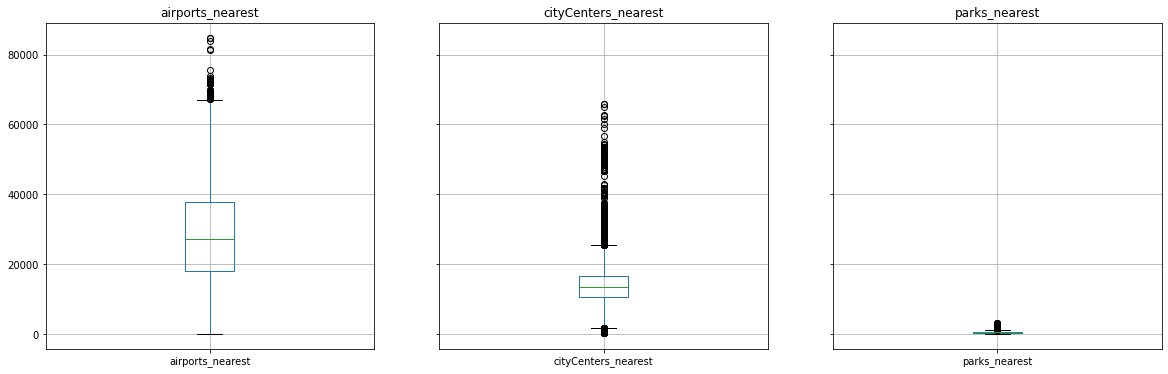

In [141]:
params = ['airports_nearest', 'cityCenters_nearest', 'parks_nearest']
fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

for i, param in enumerate(params):
    df.boxplot(param, ax=ax[i])
    ax[i].set_title(f'{param}')

Мы видим, что расстояние до аэропорта в среднем гораздо больше, чем до центра города (что логично). А информации о близости к паркам гораздо меньше в принципе(всего 7 тыс значений вместо 17 тыс по другим двум признакам), а также расстояние до парка не превышает 3 км (исходя из логики данных). Все 3 параметра распределены ненормально

**День и месяц публикации**

In [142]:
df.first_day_exposition.describe(datetime_is_numeric=True)

count                            20183
mean     2017-12-17 18:30:14.001882880
min                2014-11-27 00:00:00
25%                2017-06-28 00:00:00
50%                2018-01-11 00:00:00
75%                2018-09-07 00:00:00
max                2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

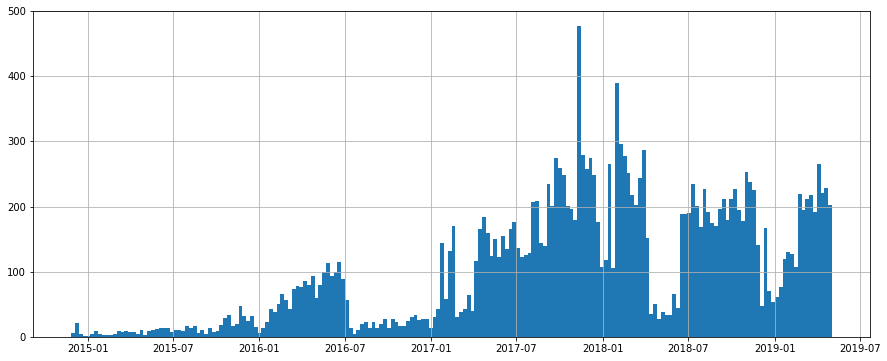

In [143]:
df.first_day_exposition.hist(bins=200, figsize=(15, 6));

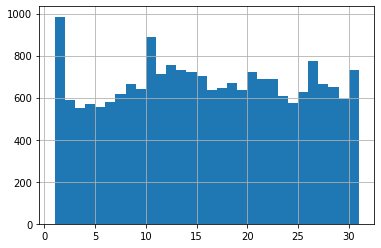

In [144]:
df.first_day_exposition.dt.day.hist(bins=30);

<div class="alert alert-da
            nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />          
стоит изменить параметры отображения гистограммы, сейчас может показаться, что в конце месяца публикуют значительное кол-во объявлений

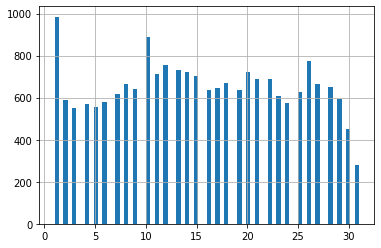

In [145]:
df.first_day_exposition.dt.day.hist(bins=70);

<div class="alert alert-block alert-info">
    <font size="3", color = "black">
Готово. Это чтобы 31е и 30е не соединялись?    
</font>
</div>

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> все верно

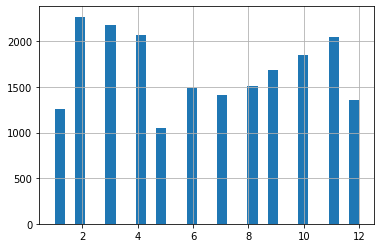

In [146]:
df.first_day_exposition.dt.month.hist(bins=30);

Мы видим, что в 2017 и 2018 году публиковалось значительно больше объявляний, чем в 2015 и 2016. Есть месяцы, когда публиковалось мало объявлений, есть, когда много. Также мы видим, что в среднем в 1 и 10 число месяца чаще всего публикуют объявления, а что касается месяца публикации, чаще всего публикуют в феврале и марте, а реже всего в мае и январе.

<div class="alert alert-dan
            ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />          
Осталось добавить гистограмму
        
Шаг 4. Проведите исследовательский анализ данных:
1.	Изучите следующие параметры объектов:
    +	общая площадь;
    +	жилая площадь;
    +	площадь кухни;
    +	цена объекта;
    +	количество комнат;
    +	высота потолков;
    +	этаж квартиры;
    +	__тип этажа квартиры («первый», «последний», «другой»);__
    +	общее количество этажей в доме;
    +	расстояние до центра города в метрах;
    +	расстояние до ближайшего аэропорта;
    +	расстояние до ближайшего парка;
    +	день и месяц публикации объявления.


__Постройте отдельные гистограммы для каждого из этих параметров.__ Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.        

---
Тип этажа квартиры («первый», «последний», «другой»)

In [147]:
df.groupby('floor_type')['floor'].count()

floor_type
другой       14801
первый        2550
последний     2832
Name: floor, dtype: int64

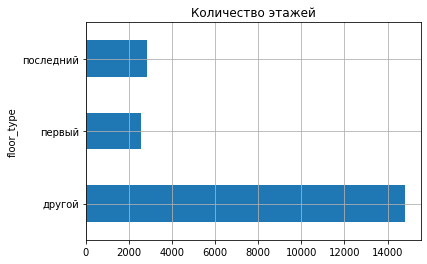

In [148]:
fig, ax = plt.subplots()
df.groupby('floor_type')['floor'].count().plot( kind='barh', grid=True);
ax.set_title('Количество этажей');

Мы видим, что больше всего этажей "не первый и не последний"

<div class="alert alert-block alert-info">
    <font size="3", color = "black">
Готово   
</font>
</div>

#### Как быстро продавались квартиры

In [149]:
df.days_exposition.describe()

count    17540.000000
mean       137.920410
std        137.559642
min          1.000000
25%         42.000000
50%         86.000000
75%        191.000000
max        616.000000
Name: days_exposition, dtype: float64

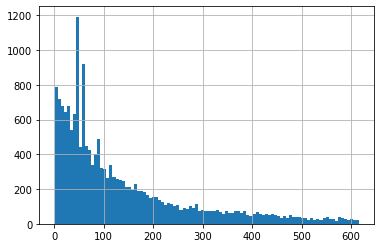

In [150]:
df.days_exposition.hist(bins=100);

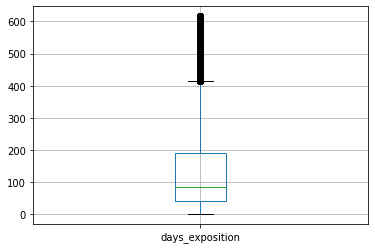

In [151]:
df.boxplot('days_exposition');


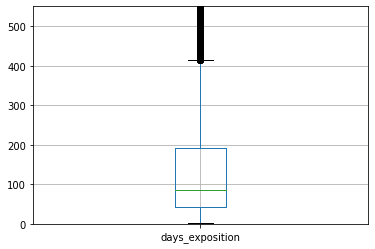

In [152]:
df.boxplot('days_exposition')
plt.ylim(0, 550);

Мы видим, что есть очень быстрые продажи (от 0 дней, т.е. проданы в тот же день), и очень долгие (самая долгая более 4 лет). Медиана 93, то есть половина квартир продается быстрее.  В целом, мне кажется, как быструю я бы определила продажу быстрее 44 дней (25 процентиля), как долгую - больше 75 процентиля (дольше 225 дней), а очень долгую (необычно долгую)- дольше 500 дней(выбросы).

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> скорость продажи рассчитана, стоило обратить внимание на пики в первые сто дней

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />         
Не исследованы моды в 'days_exposition' и как они влияют на скорость продажи, подсказка на что смотреть
        
[Условия размещения объявлений](https://yandex.ru/support/realty/owner/home/add-ads-housing.html)

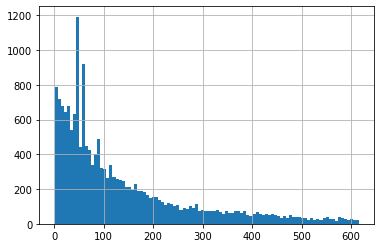

In [153]:
df.days_exposition.hist(bins=100);

In [154]:
df.days_exposition.value_counts().head(10)

45.0    833
60.0    516
7.0     217
30.0    186
4.0     162
3.0     147
5.0     137
90.0    135
14.0    135
20.0    128
Name: days_exposition, dtype: int64

Действительно, у срока размещения существуют наиболее частые значения в 45 и 60 дней, которые объясняются сроками публикации объявления в Яндекс.Недвижимости

<div class="alert alert-block alert-info">
    <font size="3", color = "black">
Готово   
</font>
</div>

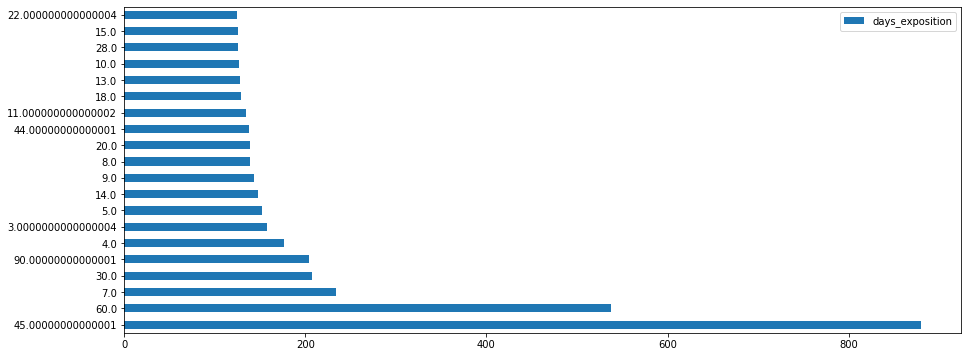

In [194]:
# check
# Моды на реальных данных

try:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t') 
except:
    df_check = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
    
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
        
Выделяются моды на 45 и 60 дней, а значения на 44 и 45 дней, явно имеет техническую причину снятия, из-за формата числа, да и другие под вопросом
        
В нашем проекте — моды могут искажать реальный расчет скорости продажи квартиры

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта

In [155]:
factors = ['total_area', 'living_area', 'kitchen_area', 
       'rooms', 'floor_type',  'publication_day_of_week', 'publication_month',
       'publication_year']

**Общая площадь**

In [156]:
df.groupby('total_area_bins')['last_price'].agg(['count', 'mean','median'])

,count,mean,median
total_area_bins,,,
"(11.999, 31.0]",1050,2.789638e+06,2951500.0
"(31.0, 33.0]",983,3.010798e+06,3100000.0
"(33.0, 35.2]",952,3.403708e+06,3450000.0
"(35.2, 37.6]",1083,3.481296e+06,3550000.0
"(37.6, 40.0]",1199,3.922903e+06,3950000.0
"(40.0, 42.0]",1041,3.856459e+06,3886000.0
"(42.0, 44.0]",1095,3.826940e+06,3850000.0
"(44.0, 46.0]",1331,4.008919e+06,4000000.0
"(46.0, 49.0]",1017,4.305738e+06,4300000.0


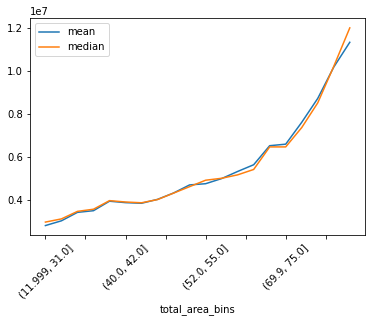

In [157]:
df.groupby('total_area_bins')['last_price'].agg(['mean','median']).plot()
plt.xticks(rotation=45);

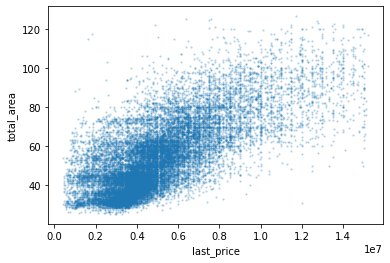

In [158]:
df.plot(y='total_area', x='last_price', kind='scatter', alpha=0.2, s=2);

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />  можно попробовать настроить вид точечных графиков      
    
[5.2. Scatter - график разброса (точки)](https://pyprog.pro/mpl/mpl_scatter.html?ysclid=l65k3vmmqd649359421)
    
на данном графике все точки слились в большое пятно.

In [159]:
df.last_price.corr(df.total_area)

0.7150009309463923

(Мы уже делили площадь на равные части, используем их для построения сводной таблицы). Мы видим, что существует прямая зависимость - с ростом площади растет и цена. Это подтверждает и коэффициент корреляции 0.74

**Жилая площадь**

In [160]:
df['living_area_bins'] = pd.qcut(df.living_area, q=20)

In [161]:
df.groupby('living_area_bins')['last_price'].agg(['count', 'mean','median'])

,count,mean,median
living_area_bins,,,
"(13.319, 15.6]",1034,3.599472e+06,3400000.0
"(15.6, 16.7]",986,3.569165e+06,3500000.0
"(16.7, 17.3]",1044,3.350742e+06,3297000.0
"(17.3, 18.0]",1562,3.453417e+06,3350000.0
"(18.0, 18.6]",494,3.701458e+06,3650000.0
"(18.6, 20.0]",1225,4.100589e+06,3970000.0
"(20.0, 23.0]",721,4.495350e+06,4250000.0
"(23.0, 27.0]",1044,4.215605e+06,4095000.0
"(27.0, 28.3]",1000,4.065268e+06,4000000.0


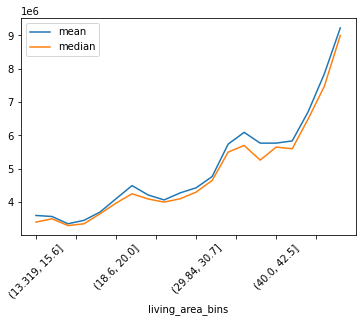

In [162]:
df.groupby('living_area_bins')['last_price'].agg(['mean','median']).plot()
plt.xticks(rotation=45);

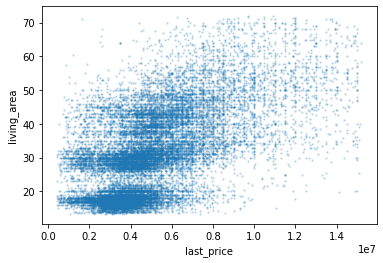

In [163]:
df.plot(y='living_area', x='last_price', kind='scatter', alpha=0.2, s=2);

In [164]:
df.last_price.corr(df.living_area)

0.5895113917543976

Также цена и зависит (прямая зависимость) и от жилой площади. Зависимость, безусловно, есть, однако не настолько линейная, так что коэффициент корреляции немного ниже

**Площадь кухни**

In [165]:
df['kitchen_area_bins'] = pd.qcut(df.kitchen_area, q=20, duplicates='drop')

In [166]:
df.groupby('kitchen_area_bins')['last_price'].agg(['count', 'mean','median'])

,count,mean,median
kitchen_area_bins,,,
"(4.949, 5.5]",1186,3.262012e+06,3250000.0
"(5.5, 6.0]",1626,3.339837e+06,3300000.0
"(6.0, 6.2]",384,4.080763e+06,4225000.0
"(6.2, 6.7]",842,3.986439e+06,3900000.0
"(6.7, 7.0]",1190,4.123409e+06,4000000.0
"(7.0, 7.6]",835,4.444701e+06,4288000.0
"(7.6, 8.0]",1303,4.603569e+06,4350000.0
"(8.0, 8.4]",888,4.356638e+06,4050000.0
"(8.4, 8.8]",855,4.269648e+06,3900000.0


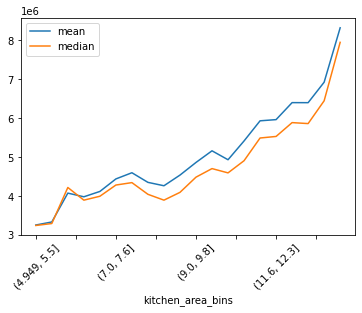

In [167]:
df.groupby('kitchen_area_bins')['last_price'].agg(['mean','median']).plot()
plt.xticks(rotation=45);

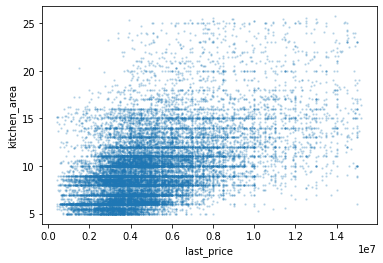

In [168]:
df.plot(y='kitchen_area', x='last_price', kind='scatter', alpha=0.2, s=2);

In [169]:
df.last_price.corr(df.kitchen_area)

0.49751336167333304

Мы видим, что цена зависит и от площади кухни, но уже не так сильно, как от общей площади (коэффициент корреляции 0,54)

**Количество комнат**

In [170]:
df.groupby('rooms')['last_price'].agg(['count', 'mean','median'])

,count,mean,median
rooms,,,
0,58,3.236776e+06,3045000.0
1,7242,3.796572e+06,3600000.0
2,7278,5.132983e+06,4700000.0
3,4890,6.404694e+06,5850000.0
4,659,7.039473e+06,6890000.0
5,53,7.409057e+06,7600000.0
6,3,1.070000e+07,12000000.0


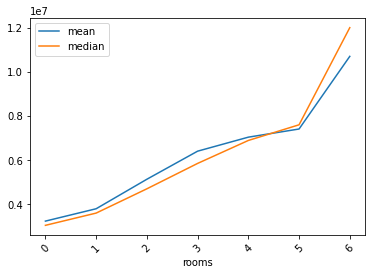

In [171]:
df.groupby('rooms')['last_price'].agg(['mean','median']).plot()
plt.xticks(rotation=45);

In [172]:
df.last_price.corr(df.rooms)

0.42774038288799715

Цена также зависит и от количества комнат (больше комнат - больше площадь, это вполне логично).

**Тип этажа**

In [173]:
df.groupby('floor_type')['last_price'].agg(['count', 'mean','median'])

,count,mean,median
floor_type,,,
другой,14801,5.246316e+06,4650000.0
первый,2550,4.172923e+06,3850000.0
последний,2832,4.636803e+06,4100000.0


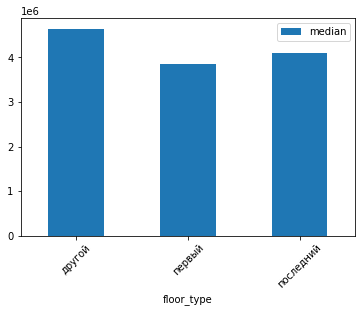

In [174]:
df.groupby('floor_type')['last_price'].agg(['median']).plot(kind='bar')
plt.xticks(rotation=45);

Мы видим, что первый этаж в среднем продается дешевле остальных, последний чуть дороже. Но больше всего котируется "не первый и не последний"

**Дата размещения**

In [175]:
df.groupby('publication_day_of_week')['last_price'].agg(['count', 'mean','median'])

,count,mean,median
publication_day_of_week,,,
0,3060,5.022328e+06,4500000.0
1,3545,5.094964e+06,4550000.0
2,3364,5.044030e+06,4500000.0
3,3604,5.042294e+06,4500000.0
4,3473,5.006382e+06,4450000.0
5,1672,4.913506e+06,4450000.0
6,1465,4.948835e+06,4450000.0


In [176]:
df.groupby('publication_month')['last_price'].agg(['count', 'mean','median'])

,count,mean,median
publication_month,,,
1,1261,4.988975e+06,4500000.0
2,2270,4.979276e+06,4477500.0
3,2177,5.040048e+06,4500000.0
4,2065,5.131113e+06,4600000.0
5,1047,4.976437e+06,4400000.0
6,1493,4.834027e+06,4270000.0
7,1416,5.011608e+06,4450000.0
8,1514,5.075422e+06,4497000.0
9,1683,5.088781e+06,4500000.0


In [177]:
df.groupby('publication_year')['last_price'].agg(['count', 'mean','median'])

,count,mean,median
publication_year,,,
2014,33,7.130700e+06,7265000.0
2015,568,5.299447e+06,4750000.0
2016,2071,4.939740e+06,4320000.0
2017,7235,4.962302e+06,4350000.0
2018,7699,4.971782e+06,4500000.0
2019,2577,5.342452e+06,4900000.0


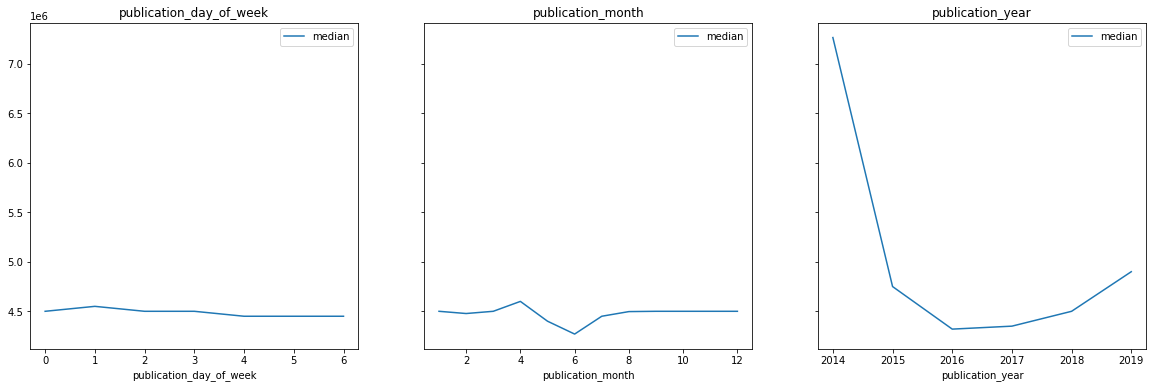

In [178]:
params = ['publication_day_of_week', 'publication_month',
       'publication_year']
fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

for i, param in enumerate(params):
    df.groupby(param)['last_price'].agg(['median']).plot(ax=ax[i])
    ax[i].set_title(f'{param}')

Как мы видим, цена объявления не зависит от дня недели и месяца публикации. Однако мы видим, что в 2014 публиковались самые дорогие объявления, в 2016-17 цены упали, а к 2019 опять немного подросли, до уровня 2015 года.

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />отметим, что нельзя ориентироваться на 2014 год, т.к. кол-во объявлений было небольшим, а стоимость объявлений высокой, м.б. это были маркетинговые объявления в начале работы сервиса ...

<div class="alert alert-block alert-info">
    <font size="3", color = "black">
Тут соглашусь, делать выводы по 33 объявлением и впрямь было несколько неверным   
</font>
</div>

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [179]:
cities_max_objects = df.groupby('locality_name')['total_images'].count()\
                        .sort_values(ascending=False)\
                        .head(10)\
                        .index\
                        .to_list()

In [180]:
df[df.locality_name.isin(cities_max_objects)]\
                        .groupby('locality_name')[['square_meter_price']]\
                        .mean()\
                        .sort_values('square_meter_price', ascending=False).round(2)

,square_meter_price
locality_name,
Санкт-Петербург,106931.18
Пушкин,100921.63
деревня Кудрово,92328.96
поселок Парголово,89793.17
поселок Мурино,84492.56
поселок Шушары,77690.92
Колпино,75233.10
Гатчина,69299.35
Всеволожск,67168.99


Ответ: самая высокая стоимость м2 - Санкт-Петербург, Пушкин. Самая низкая - Выборг и Всеволожск.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />ТОП-10 рассчитан корректно

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Недостаточно найти числа, стоит их показать красиво, удобно и наглядно, чтобы одного взгляда хватило, где самые самые, а где подешевле 📊

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />         
    
[Постер поможет выбирать вид графиков](https://www.notion.so/6c5ae8ceb8b5411e907c93c9b5e6a44e)

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> на проектах стоит снижать размерность выводимой информации, где не требуется максимальная точность, до одного или двух знаков после запятой
        
            Всеволожск	67275.625859
            Выборг	58027.737393

In [181]:
top_10 = df[df.locality_name.isin(cities_max_objects)]\
                        .groupby('locality_name')[['square_meter_price']]\
                        .mean()\
                        .sort_values('square_meter_price', ascending=True)

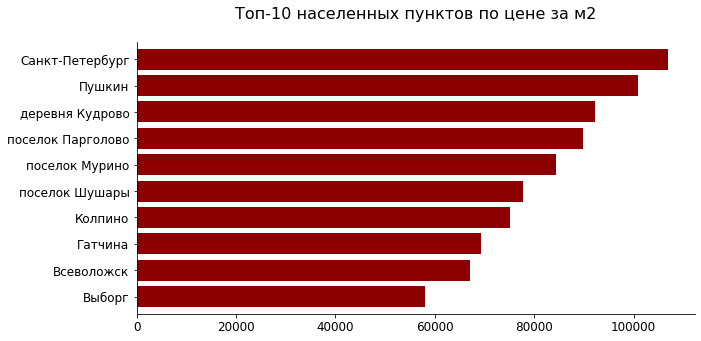

In [182]:
ax = top_10.plot(kind='barh', legend=False, figsize=(10,5), width=0.8, color='darkred', fontsize = 12);
ax.set_ylabel('')
ax.set_title('Топ-10 населенных пунктов по цене за м2\n', fontsize = 16)
sns.despine()

<div class="alert alert-block alert-info">
    <font size="3", color = "black">
Готово   
</font>
</div>

#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [183]:
df.query('locality_name == "Санкт-Петербург"')\
            .groupby('cityCenters_nearest_km')[['last_price']]\
            .agg(['count', 'mean', 'median'])

last_price                         
                            count          mean     median
cityCenters_nearest_km                                    
1.0                            45  9.219844e+06  9000000.0
2.0                           117  8.925778e+06  8500000.0
3.0                           167  8.073328e+06  7990000.0
4.0                           336  7.735039e+06  7475000.0
5.0                           518  8.349485e+06  7860000.0
6.0                           472  7.783713e+06  7500000.0
7.0                           311  7.394623e+06  6700000.0
8.0                           299  7.321409e+06  6600000.0
9.0                           527  6.585602e+06  5900000.0
10.0                          593  5.654686e+06  4900000.0
11.0                          814  5.532324e+06  4900000.0
12.0                         1275  5.504382e+06  4950000.0
13.0                         1383  5.646335e+06  5000000.0
14.0                         1270  5.756932e+06  5150000.0
15.0                         1383  5.390976e+06  4800000.0
16.0                         1281  5.318353e+06  4800000.0
17.0                         1017  5.169005e+06  4600000.0
18.0                          468  4.773444e+06  4400000.0
19.0                          157  5.029520e+06  4420000.0
20.0                           73  4.600828e+06  4500000.0
21.0                           74  6.349970e+06  6120000.0
22.0                          182  5.061330e+06  4697500.0
23.0                          133  5.136659e+06  5000000.0
24.0                           25  4.145200e+06  3690000.0
25.0                           22  3.862235e+06  3480000.0
26.0                           52  4.412118e+06  4300000.0
27.0                            3  3.575000e+06  3975000.0
28.0                            2  8.300000e+06  8300000.0
29.0                            9  4.970556e+06  4850000.0
30.0                            3  3.833333e+06  4200000.0

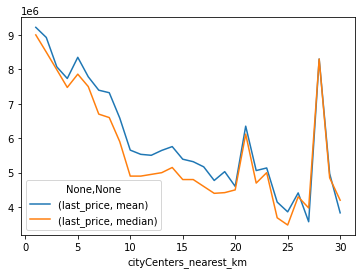

In [184]:
df.query('locality_name == "Санкт-Петербург"')\
            .groupby('cityCenters_nearest_km')[['last_price']]\
            .agg(['mean', 'median']).plot();

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Молодец, у тебя получилось сгруппировать и построить зависимость цены от расстояния до центра
        


In [185]:
df.last_price.corr(df.cityCenters_nearest_km)

-0.3449864675309728

In [186]:
df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km == 28')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,total_area_bins,last_price_mln,square_meter_price,publication_day_of_week,publication_month,publication_year,floor_type,cityCenters_nearest_km,living_area_bins,kitchen_area_bins
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,"(69.9, 75.0]",14.35,193918.92,1,11,2017,другой,28.0,"(29.84, 30.7]","(16.6, 25.74]"
5961,6,2250000.0,32.0,2018-02-27,1,2.70,2,16.5,2,False,...,"(31.0, 33.0]",2.25,70312.50,1,2,2018,последний,28.0,"(15.6, 16.7]","(6.7, 7.0]"


In [187]:
df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km != 28')\
                        .last_price.corr(df.cityCenters_nearest_km)

-0.3569680100502079

Мы видим, что в целом, чем дальше квартира от центра Санкт-Петербурга, тем она дешевле. Есть странный пик на 28 километрах, однако, мы можем увидеть, что этот пик дает всего одна дорогая квартира. Также на 21 км квартиры нарушают эту зависимость, они там чуть дороже - возможно, это какой-то район с довольно дорогой недвижимостью (условное рублевское направление в Москве). Коэффициент корреляции также говорит нам о небольшой обратной зависимости. 

### Общий вывод

Мы изучили арзив объявлений о продаже квартир в Санкт-Петербурге и окрестностях за период с 2014 по 2019 год. Данные в архиве имеют довольно много пропусков - пропущенные при заполнении данных объявления человеком (`ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name`), незаполненные картографические данные (`airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest`), а также пропуски в `days_exposition` (в случае, если квартира еще не продана).  
  
Мы заполнили пропуски, значения которых могли предположить (высота потолка - медиана, пропуски балконы и апартаменты - посчитали, что они отсутвтуют или не являются апартаментами, площадь жилая и кухни заполнили на основе медианы по жилой площади, пропущенные названия городов  - по картографическим данным).  
  
Далее мы исправили аномальные значения некоторых параметров, и для уменьшения дисперсии исключили из исследования 5% самых дорогих квартир, и приступили к исследованию: вычислили дополнительные колонки, описали все параметры квартиры (посмотрели распределение признаков).
  
Выяснили, что быстрые продажи - квартира продана быстрее 44 дней, долгие - дольше 225 дней, а очень долгие - дольше 500 дней.
  
Также выяснили, что на цену объекта больше всего влияет общая площадь, чуть меньше - жилая, площадь кухни, число комнат (прямая зависимость). Первые и последние этажи продаются дешевле других. День и месяц публикации объявления совсем не влияет на цену, а вот год - да: в 2014 в среднем квартиры стоили дороже, в 2016-2017 было падение цен, а к 2019 - восстановление цен на уровень 2015 года. 
  
Мы вычислили самую высокую стоимость м2 - Санкт-Петербург, Пушкин. Самая низкая - Выборг и Всеволожск.
А также выяснили, что в Санкт-Петербурге квартиры с удалением от центра становятся дешевле. Выделяется из этой тенденции лишь район с дорогой недвижимостью около 20 км от центра города. 
  
Таким образом, обнаруженные зависимости на рынке недвижимости Санкт-Петербурга кажутся вполне логичными. Чем квартира больше и ближе к центру (особенно столицы региона) - тем там больше комнат - да еще если этаж не первый и не последний - тем она дороже. 

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Практически идеальный вывод, есть сравнения показателей, инсайты, анализ рынка недвижимости, молодец

<div class="alert alert-success">
<font size="5"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
Выполнила исследовательскую работу, молодец, показала хороший уровень навыков программирования
        
Критические ❌ комментарии минимальны

+ проверить корректность заполнения пропусков синтетическими данными        
+ завершить фильтрацию редких значений в п. 2.4
+ исправить гистограмму и добавить гистограмму в п.4.1
               
С ними важно поработать и исправить
        
Стоит обратить внимание и на такие комментарии ⚠️
        
Если будут вопросы про мои комментарии - задавай, если какой-то формат взаимодействия не устраивает или есть какие-то другие пожелания - пиши :)

<div class="alert alert-success">
    <font size="5"><b>Жду твой проект и твои комментарии 🤝</b></font><br />
    
нумерация пунктов из брифа проекта, у тебя они могут быть другие

<div class="alert alert-block alert-info">
    <font size="3", color = "black">
Так, ну по твоим поправкам вроде бы все сделала. Как считаешь?
<br />  <br />        
Еще раз спасибо за ревью, все мои комментарии и вопросы в голубых прямоугольниках посреди ноутбука, надеюсь, их все прочитаешь и ответишь) Все ссылочки твои сохранила в копилку, проглядела по диагонали, но читать пока сил не было (ох уж этот проект, полтретьего ночи, а я только заканчиваю)))
        
Хорошего дня! (или что там у тебя сейчас)
</font>
</div>

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />    
<p> Доп. материал: методы группировки и расчета суммы, средних и т.д.
        
[Подробное руководство по группировке и агрегированию с помощью pandas](https://dfedorov.spb.ru/pandas/%D0%9F%D0%BE%D0%B4%D1%80%D0%BE%D0%B1%D0%BD%D0%BE%D0%B5%20%D1%80%D1%83%D0%BA%D0%BE%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D0%BE%20%D0%BF%D0%BE%20%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B5%20%D0%B8%20%D0%B0%D0%B3%D1%80%D0%B5%D0%B3%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20pandas.html)
    
 Интересная функция в библиотеке пандаса
        
[Понимание функции transform в Pandas](https://dfedorov.spb.ru/pandas/%D0%9F%D0%BE%D0%BD%D0%B8%D0%BC%D0%B0%D0%BD%D0%B8%D0%B5%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8%20transform%20%D0%B2%20Pandas.html)

### Бонус

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в2</b></font>
<br /> 
<font size="3", color = "black">
<br />Диаграмма рассеяния

In [195]:
# check
import seaborn as sns

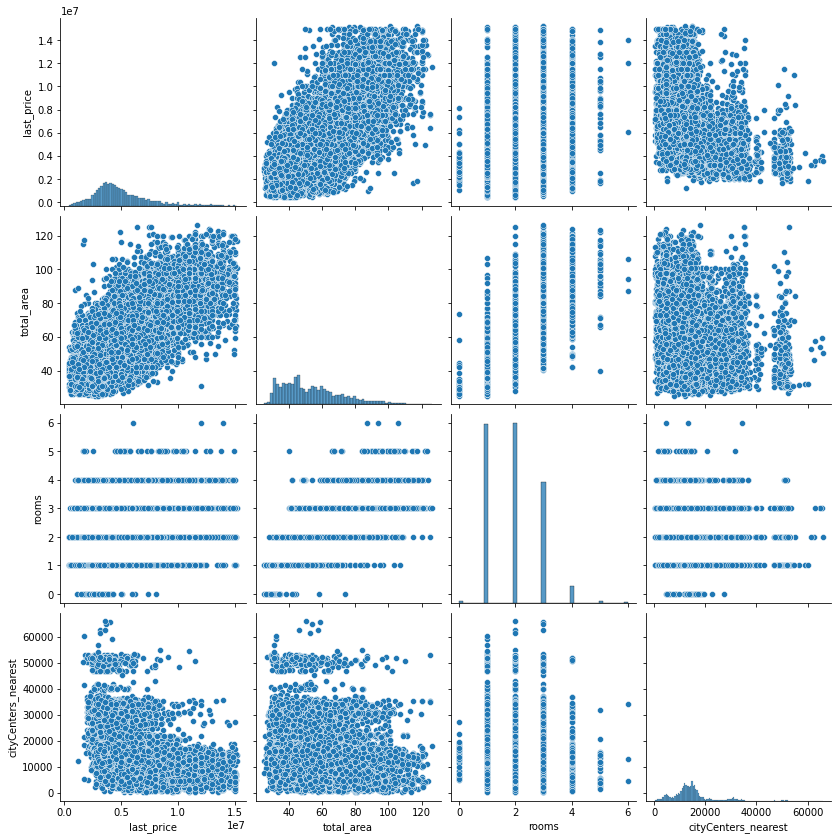

In [198]:
# check
sns.pairplot(df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в2</b></font>
<br /> 
<font size="3", color = "black">
<br />         
    
[5.2. Scatter - график разброса (точки)](https://pyprog.pro/mpl/mpl_scatter.html?ysclid=l65k3vmmqd649359421)

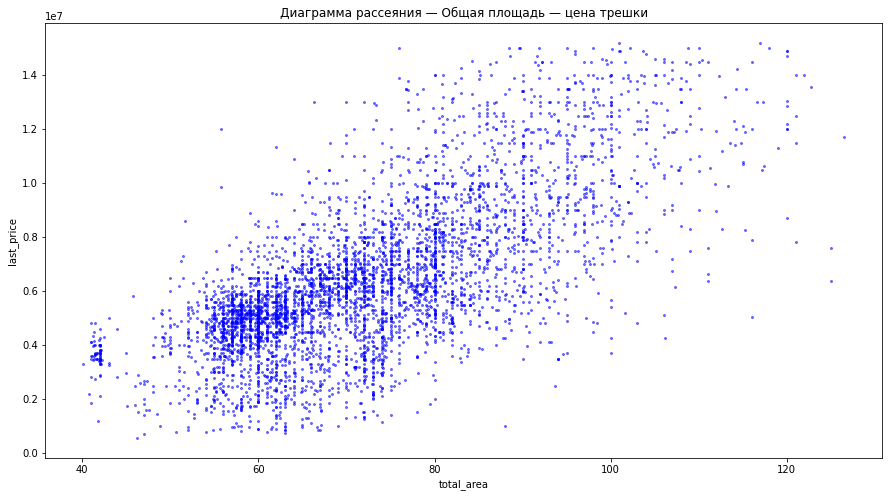

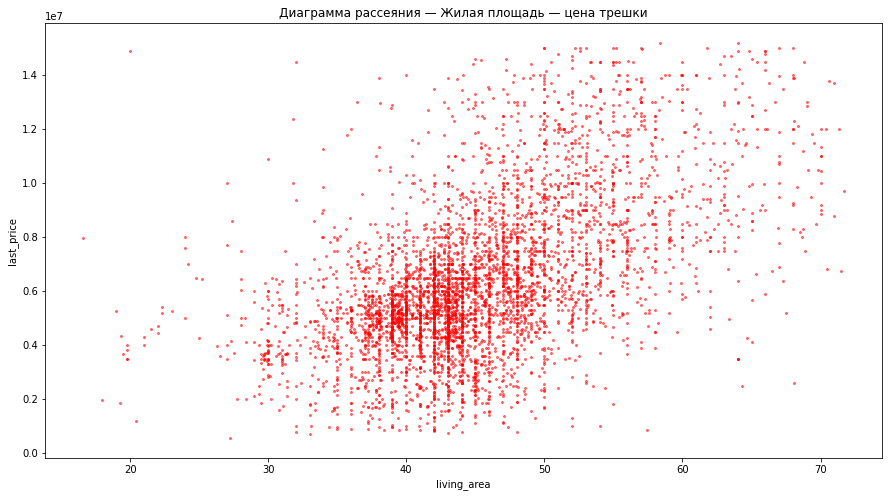

In [200]:
# check

data = df.copy()

data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод